In [1]:
#import data analysis packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
folder_name = 'results/tm'

jz = pd.read_excel('datasets/job_zone.xlsx').rename(
    columns=lambda x: x.lower().replace(" ", "_")
).drop(columns=['date', 'domain_source','o*net-soc_code']).rename(
    columns={'job_zone': 'zone'}
)

In [44]:
#open json file as dataframe
df = pd.read_json(folder_name + "/simllama3.3_prompt1_results.json", lines=True).dropna()
#merge with jz 
df = pd.merge(df, jz, how='left', on='title')
df

,title,ref_task,ind,gen_task,iteration,score,matrix,ref_order,gen_order,zone
0,Hydroelectric Production Managers,"[Direct operations, maintenance, or repair of ...",11,[Oversee daily operations of hydroelectric pow...,0,0.439716,"[[0.7391198277000001, 0.5310257077, 0.44288802...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 7, 2, 16, 1, 5, 8, 17, 3, 4, 10, 14, 6, 12...",3
1,Water Resource Specialists,"[Perform hydrologic, hydraulic, or water quali...",11,[1. Conduct hydrologic studies to understand w...,0,0.483074,"[[0.698381722, 0.48019385340000004, 0.53673452...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 20, 8, 1, 10, 11, 9, 4, 18, 16, 14, 6, 7, ...",4
2,Architectural and Engineering Managers,[Manage the coordination and overall integrati...,11,[Manage architectural and engineering projects...,0,0.359666,"[[0.7535146475000001, 0.49145627020000004, 0.5...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[0, 5, 17, 1, 12, 2, 13, 6, 7, 15, 10, 3, 14, ...",5
3,Credit Counselors,[Calculate clients' available monthly income t...,13,[Conduct financial assessments to identify cli...,0,0.484800,"[[0.6794595718, 0.5608273745, 0.45011103150000...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[13, 14, 1, 7, 0, 20, 18, 19, 5, 22, 15, 4, 9,...",4
4,Personal Financial Advisors,[Interview clients to determine their current ...,13,[1. Conduct financial analysis to identify cli...,0,0.471541,"[[0.6384170055, 0.6197897196000001, 0.41099828...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[19, 5, 4, 9, 13, 2, 6, 1, 10, 11, 8, 0, 7, 14...",4
...,...,...,...,...,...,...,...,...,...,...
425,"Furnace, Kiln, Oven, Drier, and Kettle Operato...","[Monitor equipment operation, gauges, and pane...",51,"[Monitor furnace, kiln, oven, drier, and kettl...",9,0.286867,"[[0.4347870648, 0.201171875, 0.5040289164, 0.2...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[13, 16, 4, 7, 15, 9, 10, 12, 5, 3, 1, 14, 8, ...",2
426,Power Plant Operators,"[Control generator output to match the phase, ...",51,[Monitor power plant equipment performance to ...,9,0.316284,"[[0.3743908405, 0.6889349222000001, 0.14840637...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 3, 5, 7, 0, 20, 4, 17, 21, 16, 2, 9, 14, 1...",2
427,"Painting, Coating, and Decorating Workers","[Apply coatings, such as paint, ink, or lacque...",51,"[Apply coats of paint, varnish, or other finis...",9,0.358525,"[[0.6683068275, 0.5342556834000001, 0.42982649...","[0, 1, 2, 3, 4, 5, 6, 7, 8]","[0, 7, 6, 8, 3, 4, 2, 5, 1]",1
428,"Laborers and Freight, Stock, and Material Move...",[Maintain equipment storage areas to ensure th...,53,"[Load and unload cargo from trucks, ships, and...",9,0.360469,"[[0.34457543490000003, 0.6845071316, 0.4303612...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[6, 10, 0, 9, 2, 4, 12, 3, 1, 11, 8, 5, 7]",2


In [20]:
def get_result(df):
    score_df = df.groupby("title").agg({
        "perfect_match": "mean",
        "related": "mean",
        "ind": "first"
    }).reset_index()
    #merge with jz
    score_df = score_df.merge(right=jz, left_on="title", right_on="title")
    return score_df

Text(0.5, 1.0, 'mean similarity score by title')

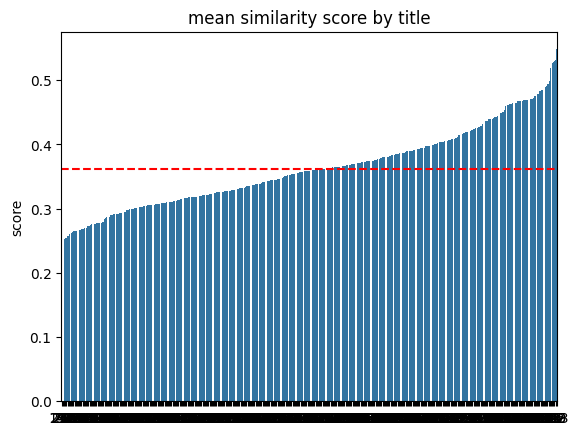

In [21]:
mean_score = df["score"]
#add a average line


#plot the series using column chat
sns.barplot(mean_score, order=mean_score.sort_values().index)
#add a average line
plt.axhline(y=mean_score.mean(), color='r', linestyle='--')

plt.title("mean similarity score by title")

Text(0.5, 1.0, 'mean similarity score by industry')

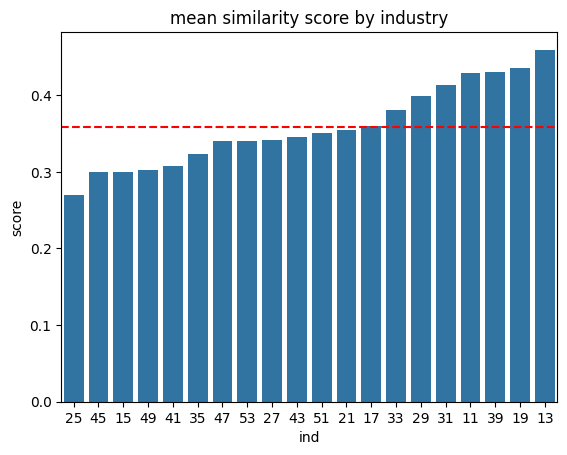

In [22]:
# get mean similarity score base on industry
mean_score = df.groupby("ind")["score"].mean()
#add a average line


#plot the series using column chat
sns.barplot(mean_score, order=mean_score.sort_values().index)
#add a average line
plt.axhline(y=mean_score.mean(), color='r', linestyle='--')

plt.title("mean similarity score by industry")

Text(0.5, 1.0, 'mean similarity score by job zone')

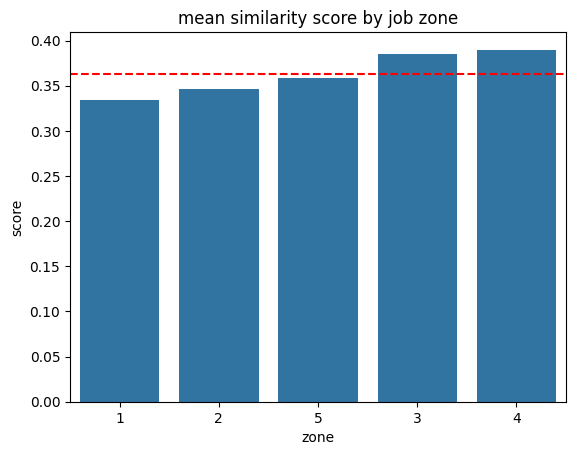

In [23]:
#plot similarity score by job zone
mean_score = df.groupby("zone")["score"].mean()
plt.axhline(y=mean_score.mean(), color='r', linestyle='--')
sns.barplot(mean_score, order=mean_score.sort_values().index)
plt.title("mean similarity score by job zone")

In [24]:
max_similarity = df[df["score"] == df["score"].max()]
max_similarity

,title,ref_task,ind,gen_task,iteration,score,matrix,ref_order,gen_order,zone
97,Survey Researchers,"[Review, classify, and record survey data in p...",19,[Design and implement surveys to collect data ...,2,0.548057,"[[0.6745726466, 0.6359671354, 0.66765576600000...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 12, 1, 10, 2, 3, 14, 4, 0, 6, 8, 13, 15, 1...",5


Text(0.5, 1.0, 'similarity matrix of Survey Researchers')

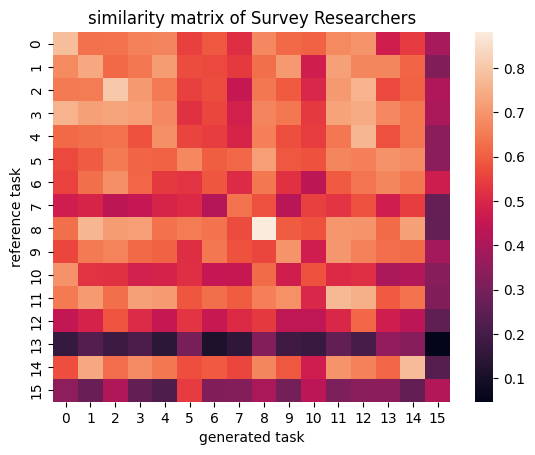

In [25]:
x = max_similarity.index.values[0]
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])

In [26]:
min_similarity = df[df["score"] == df["score"].min()]
min_similarity

,title,ref_task,ind,gen_task,iteration,score,matrix,ref_order,gen_order,zone
142,"Forestry and Conservation Science Teachers, Po...","[Prepare course materials, such as syllabi, ho...",25,[Develop curricula for forestry and conservati...,3,0.243514,"[[0.3446234465, 0.3126565814, 0.24677595500000...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[6, 1, 4, 8, 13, 10, 5, 7, 23, 12, 0, 3, 14, 2...",5


Text(0.5, 1.0, 'similarity matrix of Forestry and Conservation Science Teachers, Postsecondary')

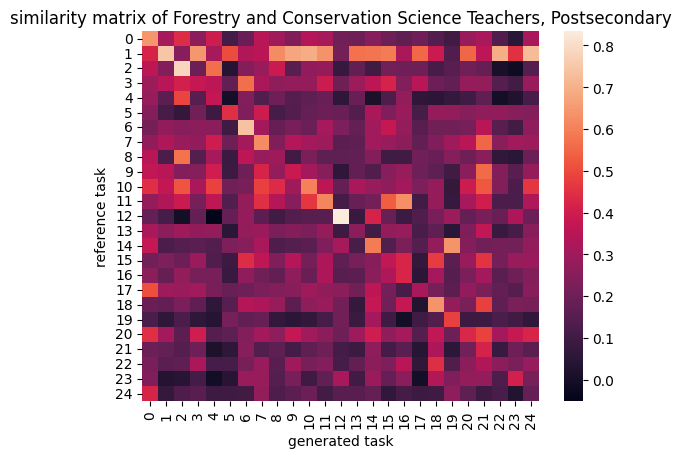

In [27]:
x = min_similarity.index.values[0]
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])

In [28]:
#create a df dropping the rows with matrix shape not equal to (x, x)
df_test = df[df["matrix"].apply(lambda x : np.shape(x)[0] == np.shape(x)[1])]
#define a function to rearrange matrix based on gen_order
def rearrange_matrix(matrix, order):
    return matrix[:, order]
#apply the function to the matrix column
df_test["rearranged_matrix"] = df_test.apply(lambda x : rearrange_matrix(np.array(x["matrix"]), x["gen_order"]), axis=1)



In [29]:
# find the best rearranged matrix
def is_diagonally_dominant(rearranged_matrix):
    D = np.abs(np.diag(rearranged_matrix))
    S = np.sum(np.abs(rearranged_matrix), axis=1) - D
    return np.all(D >= S)

def calculate_score(rearranged_matrix):
    score = 0
    for i in range(np.shape(rearranged_matrix)[0]):
        max_off_diagonal = max(abs(rearranged_matrix[i][j]) for j in range(np.shape(rearranged_matrix)[1]) if j != i)
        score += abs(rearranged_matrix[i][i]) - max_off_diagonal
    return score

def find_best_rearranged_matrix(df):
    best_score = -float('inf')
    best_index = None
    for index, row in df.iterrows():
        rearranged_matrix = row['rearranged_matrix']
        if is_diagonally_dominant(rearranged_matrix):
            score = calculate_score(rearranged_matrix)
            if score > best_score:
                best_score = score
                best_index = index
    if best_index is not None:
        return best_index, best_score
    else:
        # If no diagonally dominant rearranged_matrix found, consider all with highest score
        for index, row in df.iterrows():
            rearranged_matrix = row['rearranged_matrix']
            score = calculate_score(rearranged_matrix)
            if score > best_score:
                best_score = score
                best_index = index
        return best_index, best_score

In [30]:
# Example usage
index, score = find_best_rearranged_matrix(df_test)
if index is not None:
    print(f"The best rearranged_matrix is at index {index} with score {score}")
else:
    print("No suitable rearranged_matrix found.")

The best rearranged_matrix is at index 401 with score 1.8439366816


In [31]:
# get the row with the best rearranged matrix
print(df_test.loc[index]["ref_task"])
print(df_test.loc[index]["gen_task"])
print(df_test.loc[index]["score"])


['Teach writing or communication classes.', "Evaluate and grade students' class work, assignments, and papers.", 'Prepare course materials, such as syllabi, homework assignments, and handouts.', 'Initiate, facilitate, and moderate classroom discussions.', 'Maintain student attendance records, grades, and other required records.', 'Plan, evaluate, and revise curricula, course content, course materials, and methods of instruction.', 'Prepare and deliver lectures to undergraduate or graduate students on topics such as poetry, novel structure, and translation and adaptation.', 'Assist students who need extra help with their coursework outside of class.', 'Keep abreast of developments in the field by reading current literature, talking with colleagues, and participating in professional conferences.', 'Compile, administer, and grade examinations, or assign this work to others.', 'Maintain regularly scheduled office hours to advise and assist students.', 'Conduct research in a particular fiel

Text(0.5, 1.0, 'similarity matrix of English Language and Literature Teachers, Postsecondary')

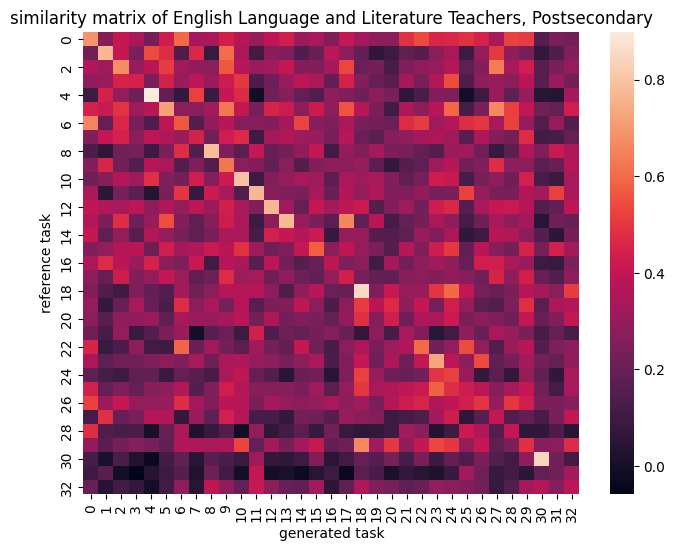

In [32]:
x = index
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
plt.figure(figsize=(8, 6))
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])

In [ ]:
df_test = df[df["matrix"].apply(lambda x : np.shape(x)[0] == np.shape(x)[1])]
df_test = calculate_similarity(df_test)
df_test

,title,ref_task,ind,gen_task,iteration,score,matrix,ref_order,gen_order,code,zone,rearranged_matrix,diagonal_similarity,off_diagonal_similarity,difference
0,Lodging Managers,[Answer inquiries pertaining to hotel policies...,11,[1. Coordinate front-office activities of hote...,0,0.550051,"[[0.713228941, 0.5630971193000001, 0.590073347...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[9, 11, 13, 17, 5, 3, 8, 23, 0, 1, 6, 16, 18, ...",11-9081.00,4,"[[0.7508575916, 0.5942677855, 0.54789072280000...",0.550051,0.330226,0.219825
1,Spa Managers,"[Respond to customer inquiries or complaints.,...",11,[Develop and implement marketing strategies to...,0,0.531516,"[[0.3492152095, 0.22914139930000002, 0.2940952...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[5, 3, 20, 6, 7, 11, 9, 0, 19, 18, 1, 10, 16, ...",11-9179.02,3,"[[0.6021389961, 0.2011715323, 0.3788129389, 0....",0.531516,0.284702,0.246814
2,Training and Development Managers,[Analyze training needs to develop new trainin...,11,[Designing training programs to improve employ...,0,0.648870,"[[0.7067481279000001, 0.8326070309, 0.71625906...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]","[1, 4, 0, 8, 7, 11, 6, 3, 2, 10, 9, 5]",11-3131.00,4,"[[0.8326070309, 0.6868743896, 0.70674812790000...",0.648870,0.473658,0.175212
3,Customs Brokers,[Prepare and process import and export documen...,13,[Prepare and submit customs entry documents to...,0,0.580330,"[[0.7682016492, 0.5910642147, 0.518204391, 0.8...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[3, 11, 12, 2, 5, 1, 13, 18, 8, 22, 20, 7, 16,...",13-1041.08,3,"[[0.8145998716, 0.6097154021, 0.33242908120000...",0.580330,0.355638,0.224692
4,Government Property Inspectors and Investigators,"[Prepare correspondence, reports of inspection...",13,[Inspect government-owned property to ensure c...,0,0.507692,"[[0.5265690088, 0.444504559, 0.4854095578, 0.2...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]","[4, 2, 7, 1, 0, 8, 12, 9, 10, 5, 11, 6, 3]",13-1041.04,3,"[[0.5593031645000001, 0.4854095578, 0.43245270...",0.507692,0.342465,0.165227
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425,Power Plant Operators,"[Control generator output to match the phase, ...",51,[Monitor and inspect power plant equipment and...,9,0.555895,"[[0.2404494137, 0.723092854, 0.3624368906, 0.0...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[1, 3, 12, 2, 0, 15, 13, 7, 18, 19, 4, 8, 6, 1...",51-8013.00,2,"[[0.723092854, 0.094090119, 0.4549439251000000...",0.555895,0.319041,0.236854
426,Nuclear Power Reactor Operators,[Operate nuclear power reactors in accordance ...,51,"[1. Adjust controls to regulate reactor power,...",9,0.582722,"[[0.4352696836, 0.5130941868000001, 0.58313900...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[8, 0, 10, 3, 14, 2, 12, 1, 16, 17, 5, 18, 4, ...",51-8011.00,3,"[[0.6274795532, 0.4352696836, 0.3303284943, 0....",0.582722,0.357246,0.225476
427,Metal-Refining Furnace Operators and Tenders,"[Regulate supplies of fuel and air, or control...",51,"[Monitor the temperature, pressure, and chemic...",9,0.569541,"[[0.5264048576, 0.648655057, 0.374000400300000...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[9, 4, 0, 5, 2, 1, 10, 7, 3, 6, 11, 8, 12, 14,...",51-4051.00,2,"[[0.6547672749, 0.1969602704, 0.5264048576, 0....",0.569541,0.372224,0.197317
428,Ship Engineers,"[Monitor engine, machinery, or equipment indic...",53,[Perform routine maintenance and repairs on sh...,9,0.557782,"[[0.6980013847000001, 0.4350373745, 0.73759573...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[3, 1, 12, 2, 10, 16, 0, 8, 15, 4, 13, 11, 6, ...",53-5031.00,3,"[[0.7379598022, 0.4350373745, 0.398155421, 0.7...",0.557782,0.348100,0.209683


In [ ]:
df_test[df_test["diagonal_similarity"] == df_test["diagonal_similarity"].max()]

,title,ref_task,ind,gen_task,iteration,score,matrix,ref_order,gen_order,code,zone,rearranged_matrix,diagonal_similarity,off_diagonal_similarity,difference
230,"Business Teachers, Postsecondary",[Prepare and deliver lectures to undergraduate...,25,[advise students on academic and vocational cu...,5,0.797485,"[[0.3582337499, 0.3667060435, 0.295165658, 0.3...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[16, 7, 8, 17, 9, 15, 10, 3, 2, 11, 1, 0, 23, ...",25-1011.00,5,"[[0.9245157838, 0.2723463178, 0.3463859856, 0....",0.797485,0.276848,0.520637


In [33]:
max_difference = df_test[df_test["difference"] == df_test["difference"].max()]
max_difference

KeyError: 'difference'

In [34]:
x = max_difference.index.values[0]
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])
#save the plot under the folder name results
plt.savefig("results/similarity_matrix"+ df["title"][x] + ".png")

NameError: name 'max_difference' is not defined

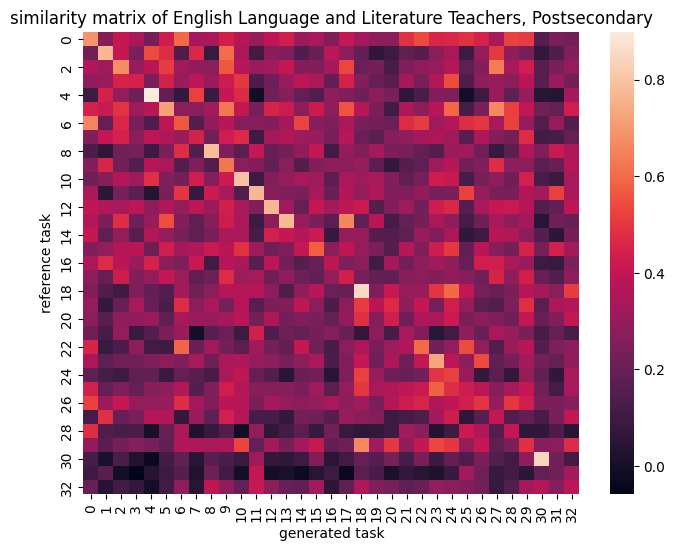

In [37]:
x = index
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
plt.figure(figsize=(8, 6))
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])
#save the plot under the folder name results
plt.savefig("results/similarity_matrix"+ df["title"][x] + ".png")

In [ ]:
mean = df["score"].mean()
np.save(folder_name + "/score.npy", mean)

<function matplotlib.pyplot.show(close=None, block=None)>

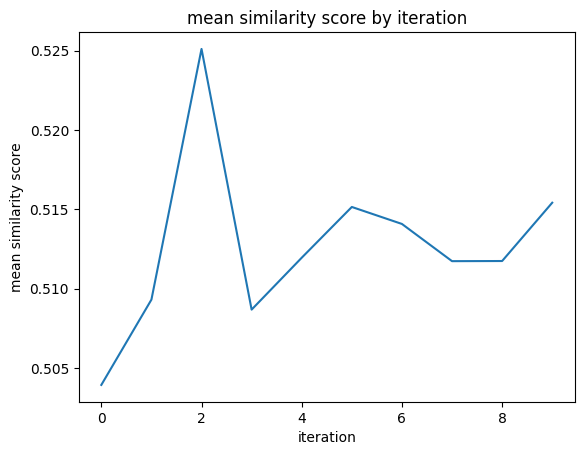

In [ ]:
# Group the df by iteration and calculate the mean score of the score column
df_grouped = df.groupby("iteration")["score"].mean()
#plot the series using column chat
sns.lineplot(df_grouped)
plt.title("mean similarity score by iteration")
plt.xlabel("iteration")
plt.ylabel("mean similarity score")
plt.show


In [8]:
# load all the json files in the folder
import os
import json
import re
import numpy as np  
import pandas as pd
import matplotlib.pyplot as plt

In [9]:
# rearrange the matrix based on the best gen_order
def rearrange_matrix(matrix, order):
    return matrix[:, order]
#for a rearranged matrix, calculate two things. 1 is the mean similarity of the diagonal, and 2 the mean similarity of the off-diagonal
def calculate_diagonal_similarity(rearranged_matrix):
    return np.mean(np.diag(rearranged_matrix))

def calculate_off_diagonal_similarity(rearranged_matrix):
    off_diagonal = np.abs(rearranged_matrix) - np.diag(np.abs(np.diag(rearranged_matrix)))
    return np.mean(off_diagonal)

#package to a function for later use
def calculate_similarity(df):
    #create a df dropping the rows with matrix shape not equal to (x, x)
    df = df[df["matrix"].apply(lambda x : np.shape(x)[0] == np.shape(x)[1])]
    #define a function to rearrange matrix based on gen_order
    df = df.copy()
    df.loc[:, "rearranged_matrix"] = df.apply(lambda x : rearrange_matrix(np.array(x["matrix"]), x["gen_order"]), axis=1)
    #apply the functions to new column diagonal_similarity and off_diagonal_similarity
    df = df.copy()
    df.loc[:, "diagonal_similarity"] = df["rearranged_matrix"].apply(calculate_diagonal_similarity)
    df = df.copy()
    df.loc[:, "off_diagonal_similarity"] = df["rearranged_matrix"].apply(calculate_off_diagonal_similarity)
    # add a column to the df that is the difference between the two
    df["difference"] = df["diagonal_similarity"] - df["off_diagonal_similarity"]
    return df

def join_iteration(df):
    df = df.groupby(["title", "ind"], group_keys=False).apply(lambda x: pd.Series({
        "score": np.array(x["score"]),
        "diagonal_similarity": np.array(x["diagonal_similarity"]),
        "off_diagonal_similarity": np.array(x["off_diagonal_similarity"]),
        "difference": np.array(x["difference"])
    })).reset_index()
    return df

def on_off_difference_array(df):
    #get the mean difference in df, by iteration, into a np array
    return df.groupby("iteration")["difference"].mean().to_numpy()

def diagnonal_similarity(df):
    #get the mean max diagonal similarity in df, by iteration, into a np array
    return df.groupby("iteration")["diagonal_similarity"].mean().to_numpy()

def general_similarity(df):
    #get the mean max diagonal similarity in df, by iteration, into a np array
    return df.groupby("iteration")["score"].mean().to_numpy()

In [5]:
folder_name = 'results/tm'

jz = pd.read_excel('datasets/job_zone.xlsx').rename(
    columns=lambda x: x.lower().replace(" ", "_")
).drop(columns=['date', 'domain_source']).rename(
    columns={'o*net-soc_code': 'code', 'job_zone': 'zone'}
)

json_files = [f for f in os.listdir(folder_name) if f.endswith('.json')]
model_name = [json_file[3:-13] for json_file in json_files]

dia_list = []
maxd_list = []
gen_sim_list = []
# Loop through each JSON file and load it into the DataFrame
for json_file in json_files:
    df = pd.read_json(os.path.join(folder_name, json_file), lines=True).dropna()
    df = df.drop(columns=["score"], axis=1)
    #create a column for mean of matrix
    df["score"] = df["matrix"].apply(lambda x: np.mean(x))
    df = calculate_similarity(df)
    maxd = on_off_difference_array(df)
    dia = diagnonal_similarity(df)
    gen_sim = general_similarity(df)
    dia_list.append(dia)
    maxd_list.append(maxd)
    gen_sim_list.append(gen_sim)

print(dia_list)
print(maxd_list)
print(gen_sim_list)

[array([0.4746827 , 0.46592683, 0.46846595, 0.46269632, 0.46560662,
       0.46353537, 0.46001738, 0.47244922, 0.46741408, 0.44585137]), array([0.47285858, 0.45893674, 0.48272969, 0.48654935, 0.47609738,
       0.47411282, 0.4606789 , 0.47986998, 0.47549622, 0.4617269 ]), array([0.56679887, 0.55467518, 0.55084081, 0.54934211, 0.54341569,
       0.54355942, 0.55639674, 0.55918975, 0.55889413, 0.54241222]), array([0.54127144, 0.5409446 , 0.54389746, 0.54265973, 0.54385209,
       0.54259569, 0.54782436, 0.54816741, 0.53891483, 0.54095613]), array([0.5372336 , 0.53015394, 0.53643745, 0.54282926, 0.53664311,
       0.53693844, 0.53683972, 0.54312022, 0.53618983, 0.53313006]), array([0.52648429, 0.53047838, 0.5302207 , 0.53604365, 0.53144318,
       0.53347271, 0.52654102, 0.53312746, 0.54021967, 0.53009303])]
[array([0.17773697, 0.17678476, 0.17600034, 0.17179061, 0.17497207,
       0.17217363, 0.17465625, 0.17734979, 0.17892853, 0.16910576]), array([0.17330691, 0.16637651, 0.18222903, 0.1

In [67]:
df = pd.read_json(os.path.join(folder_name, json_files[2]), lines=True).dropna()
df = calculate_similarity(df)
df[df["difference"] == df["difference"].max()]

,title,ref_task,ind,gen_task,iteration,score,matrix,ref_order,gen_order,rearranged_matrix,diagonal_similarity,off_diagonal_similarity,difference
13,"Forestry and Conservation Science Teachers, Po...","[Prepare course materials, such as syllabi, ho...",25,"[,, ,_selector,Forest Ecology,, Maintain stude...",0,0.27219,"[[-0.0300154127, -0.038621231900000004, 0.3768...","[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...","[22, 3, 4, 17, 2, 7, 10, 18, 5, 24, 8, 6, 19, ...","[[0.6798442602, 0.38259261850000004, 0.4830259...",0.674671,0.247339,0.427332


Text(0.5, 1.0, 'similarity matrix of Forestry and Conservation Science Teachers, Postsecondary')

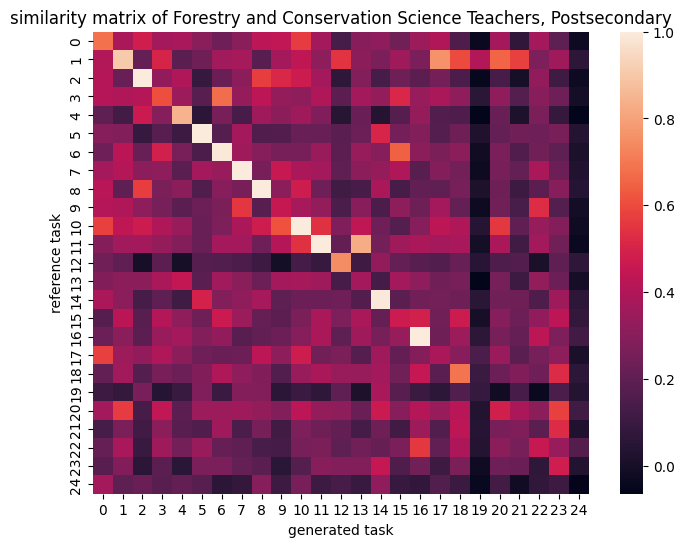

In [68]:
x = 13
matrix = np.array(df["matrix"][x])
order = df["gen_order"][x]

rearranged_matrix = matrix[:, order]
plt.figure(figsize=(8, 6))
sns.heatmap(rearranged_matrix, cmap="rocket")
plt.xlabel("generated task")
plt.ylabel("reference task")
plt.title("similarity matrix of " + df["title"][x])
#save the plot under the folder name results
# plt.savefig("results/similarity_matrix"+ df["title"][x] + ".png")

In [9]:
x = 0
df = pd.read_json(os.path.join(folder_name, json_files[x]), lines=True).dropna()
df = df.drop(columns=["score"], axis=1)
#create a column for mean of matrix
df["score"] = df["matrix"].apply(lambda x: np.mean(x))
#drop the score column
df= calculate_similarity(df)
df = df.groupby(["title"], group_keys=False).agg({
    "ind": "first",
    "score": "mean",
    "diagonal_similarity": "mean",
    "off_diagonal_similarity": "mean",
    "difference": "mean"
}).reset_index()
df = df.merge(jz, on="title", how="left")
print(json_files[x])


simdeepseek-r1_no_prompt_results.json


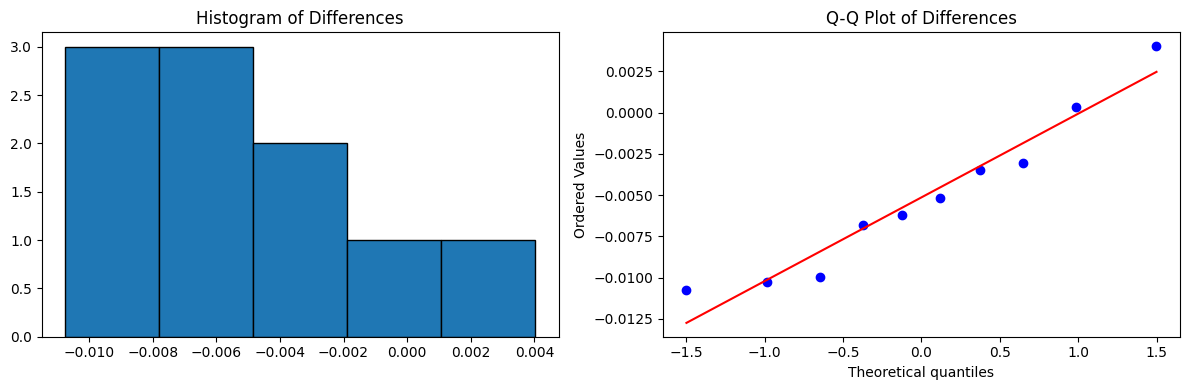

Shapiro-Wilk Statistic: 0.9366, P-value: 0.5163
Anderson-Darling Statistic: 0.2657
Critical Value at 15.0%: 0.5010, Normal
Critical Value at 10.0%: 0.5700, Normal
Critical Value at 5.0%: 0.6840, Normal
Critical Value at 2.5%: 0.7980, Normal
Critical Value at 1.0%: 0.9500, Normal


In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
x = 4
# Example data
control_means = dia_list[x]
test_means = dia_list[x+1]
differences = test_means - control_means

# Histogram
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(differences, bins=5, edgecolor='black')
plt.title("Histogram of Differences")

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(differences, dist="norm", plot=plt)
plt.title("Q-Q Plot of Differences")
plt.tight_layout()
plt.show()

# Shapiro-Wilk Test
stat, p_value = stats.shapiro(differences)
print(f"Shapiro-Wilk Statistic: {stat:.4f}, P-value: {p_value:.4f}")

# Anderson-Darling Test
result = stats.anderson(differences)
print(f"Anderson-Darling Statistic: {result.statistic:.4f}")
for crit_val, sig_level in zip(result.critical_values, result.significance_level):
    print(f"Critical Value at {sig_level}%: {crit_val:.4f}, {'Normal' if result.statistic < crit_val else 'Not Normal'}")

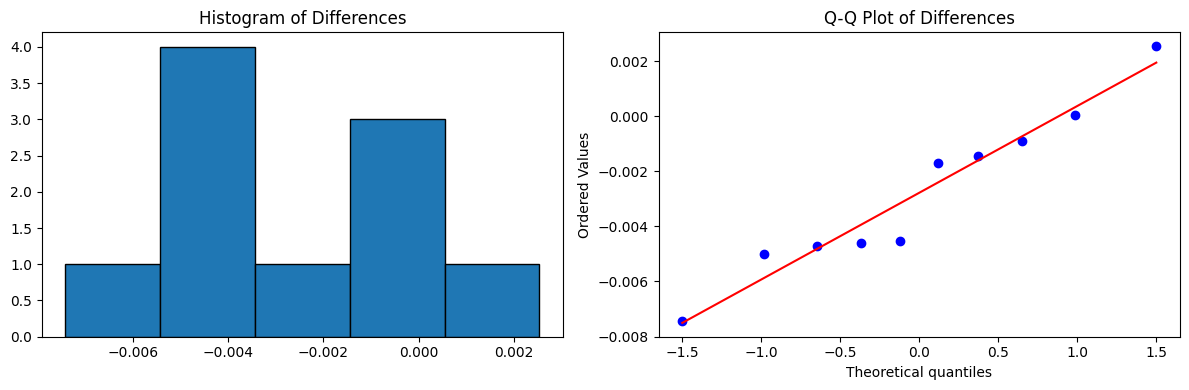

Shapiro-Wilk Statistic: 0.9530, P-value: 0.7035
Anderson-Darling Statistic: 0.3248
Critical Value at 15.0%: 0.5010, Normal
Critical Value at 10.0%: 0.5700, Normal
Critical Value at 5.0%: 0.6840, Normal
Critical Value at 2.5%: 0.7980, Normal
Critical Value at 1.0%: 0.9500, Normal


In [16]:
x = 4
# Example data
control_means = maxd_list[x]
test_means = maxd_list[x+1]
differences = test_means - control_means

# Histogram
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(differences, bins=5, edgecolor='black')
plt.title("Histogram of Differences")

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(differences, dist="norm", plot=plt)
plt.title("Q-Q Plot of Differences")
plt.tight_layout()
plt.show()

# Shapiro-Wilk Test
stat, p_value = stats.shapiro(differences)
print(f"Shapiro-Wilk Statistic: {stat:.4f}, P-value: {p_value:.4f}")

# Anderson-Darling Test
result = stats.anderson(differences)
print(f"Anderson-Darling Statistic: {result.statistic:.4f}")
for crit_val, sig_level in zip(result.critical_values, result.significance_level):
    print(f"Critical Value at {sig_level}%: {crit_val:.4f}, {'Normal' if result.statistic < crit_val else 'Not Normal'}")

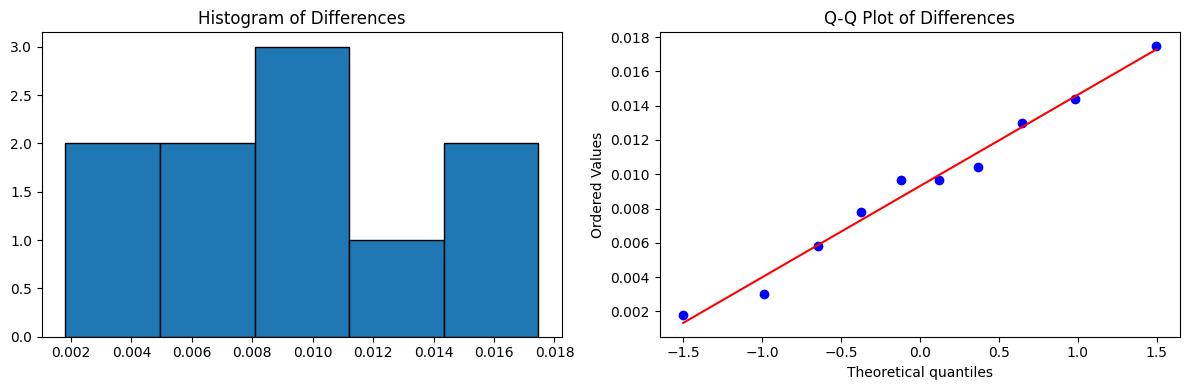

Shapiro-Wilk Statistic: 0.9767, P-value: 0.9453
Anderson-Darling Statistic: 0.1540
Critical Value at 15.0%: 0.5010, Normal
Critical Value at 10.0%: 0.5700, Normal
Critical Value at 5.0%: 0.6840, Normal
Critical Value at 2.5%: 0.7980, Normal
Critical Value at 1.0%: 0.9500, Normal


In [19]:
x = 0
# Example data
control_means = gen_sim_list[x]
test_means = gen_sim_list[x+1]
differences = test_means - control_means

# Histogram
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.hist(differences, bins=5, edgecolor='black')
plt.title("Histogram of Differences")

# Q-Q Plot
plt.subplot(1, 2, 2)
stats.probplot(differences, dist="norm", plot=plt)
plt.title("Q-Q Plot of Differences")
plt.tight_layout()
plt.show()

# Shapiro-Wilk Test
stat, p_value = stats.shapiro(differences)
print(f"Shapiro-Wilk Statistic: {stat:.4f}, P-value: {p_value:.4f}")

# Anderson-Darling Test
result = stats.anderson(differences)
print(f"Anderson-Darling Statistic: {result.statistic:.4f}")
for crit_val, sig_level in zip(result.critical_values, result.significance_level):
    print(f"Critical Value at {sig_level}%: {crit_val:.4f}, {'Normal' if result.statistic < crit_val else 'Not Normal'}")

In [14]:
import pandas as pd
from scipy.stats import ttest_ind

def perform_one_tailed_ttest(group):
    llma_scores = group[group["model"] == model_name[i]]["difference"]
    llmb_scores = group[group["model"] == model_name[i + 1]]["difference"]
    # t-test with LLMb - LLMa (test - control)
    t_stat, p_two_tailed = ttest_ind(llmb_scores, llma_scores, equal_var=False)  # Note the order
    # One-tailed p-value: LLMb > LLMa
    p_one_tailed = p_two_tailed / 2 if t_stat > 0 else 1 - (p_two_tailed / 2)
    return pd.Series({"t_stat": t_stat, "p_one_tailed": p_one_tailed})

In [15]:
i = 4
df1 = pd.read_json(os.path.join(folder_name, json_files[i]), lines=True).dropna()
df2 = pd.read_json(os.path.join(folder_name, json_files[i+1]), lines=True).dropna()
df1["model"] = model_name[i]
df2["model"] = model_name[i + 1]
combined_df = pd.concat([df1, df2], axis=0)
combined_df = combined_df.drop(columns=["score"], axis=1)
#create a column for mean of matrix
combined_df["score"] = combined_df["matrix"].apply(lambda x: np.mean(x))
combined_df = calculate_similarity(combined_df)
combined_df = pd.merge(combined_df, jz, on="title", how="left")
results = combined_df.groupby("title").apply(perform_one_tailed_ttest).reset_index()
print(f"One-Tailed t-test Results ({model_name[i + 1]} > {model_name[i]}):")
results.sort_values(by="p_one_tailed", ascending=True)[["title", "p_one_tailed"]]
# results[results["p_one_tailed"] < 0.05].sort_values(by="p_one_tailed", ascending=True)[["iteration", "p_one_tailed"]]

One-Tailed t-test Results (mistral_prompt1 > mistral_no_prompt):


C:\Users\godfr\AppData\Local\Temp\ipykernel_18436\1016049266.py:12: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  results = combined_df.groupby("title").apply(perform_one_tailed_ttest).reset_index()


,title,p_one_tailed
15,Exercise Physiologists,0.008561
41,Tile and Stone Setters,0.046148
10,Correspondence Clerks,0.054260
21,Gambling Cage Workers,0.063789
30,Patient Representatives,0.083046
35,Registered Nurses,0.111682
20,"Furnace, Kiln, Oven, Drier, and Kettle Operato...",0.120230
22,"Helpers--Pipelayers, Plumbers, Pipefitters, an...",0.126402
18,Fishing and Hunting Workers,0.273266
2,"Area, Ethnic, and Cultural Studies Teachers, P...",0.297641


In [16]:
i = 5
key = "zone"
print(combined_df[combined_df["model"] == model_name[i]].groupby(key).agg({
    "score": "mean",
    "diagonal_similarity": "mean",
    "difference": "mean"
}).reset_index().sort_values(by="score", ascending=False)[:][key].values.tolist())

print(combined_df[combined_df["model"] == model_name[i]].groupby(key).agg({
    "score": "mean",
    "diagonal_similarity": "mean",
    "difference": "mean"
}).reset_index().sort_values(by="diagonal_similarity", ascending=False)[:][key].values.tolist())

print(combined_df[combined_df["model"] == model_name[i]].groupby(key).agg({
    "score": "mean",
    "diagonal_similarity": "mean",
    "difference": "mean"
}).reset_index().sort_values(by="difference", ascending=False)[:][key].values.tolist())



[4, 3, 5, 2, 1]
[4, 5, 3, 1, 2]
[1, 5, 2, 4, 3]


In [17]:
key = "ind"
print(combined_df[combined_df["model"] == model_name[i]].groupby(key).agg({
    "score": "mean",
    "diagonal_similarity": "mean",
    "difference": "mean"
}).reset_index().sort_values(by="score", ascending=False)[:3][key].values.tolist())

print(combined_df[combined_df["model"] == model_name[i]].groupby(key).agg({
    "score": "mean",
    "diagonal_similarity": "mean",
    "difference": "mean"
}).reset_index().sort_values(by="diagonal_similarity", ascending=False)[:3][key].values.tolist())

print(combined_df[combined_df["model"] == model_name[i]].groupby(key).agg({
    "score": "mean",
    "diagonal_similarity": "mean",
    "difference": "mean"
}).reset_index().sort_values(by="difference", ascending=False)[:3][key].values.tolist())



[13, 19, 39]
[13, 31, 19]
[25, 45, 31]


In [18]:
consistency = combined_df.groupby(["title", "model"]).agg(
    mean_score=("diagonal_similarity", "mean"),
    std_dev=("diagonal_similarity", "std"),
    count=("diagonal_similarity", "count")
).reset_index()
consistency["cv"] = consistency["std_dev"] / consistency["mean_score"]
consistency["se"] = consistency["std_dev"] / (consistency["count"] ** 0.5)
print("\nConsistency Metrics:")
consistency.describe()


Consistency Metrics:


,mean_score,std_dev,count,cv,se
count,86.000000,86.000000,86.0,86.000000,86.000000
mean,0.534382,0.021396,10.0,0.040650,0.006766
std,0.043938,0.008120,0.0,0.016535,0.002568
min,0.444980,0.008111,10.0,0.015151,0.002565
25%,0.504065,0.016047,10.0,0.028365,0.005075
50%,0.530187,0.020937,10.0,0.039003,0.006621
75%,0.563644,0.026140,10.0,0.048733,0.008266
max,0.631179,0.054878,10.0,0.095263,0.017354


Descriptive Statistics:
deepseek-r1_benchmark: Mean = 0.1749, Variance = 0.0000
deepseek-r1_persona: Mean = 0.1746, Variance = 0.0000
llama3.3_benchmark: Mean = 0.2156, Variance = 0.0000
llama3.3_persona: Mean = 0.2122, Variance = 0.0000
mistral_benchmark: Mean = 0.2051, Variance = 0.0000
mistral_persona: Mean = 0.2023, Variance = 0.0000

Levene's Test for Equal Variances: p-value = 0.3699

ANOVA Results:
F-statistic: 270.9706
p-value: 0.0000
Result: Reject the null hypothesis. There is a significant difference between the groups.


C:\Users\godfr\AppData\Local\Temp\ipykernel_25820\709449048.py:34: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(groups, labels=labels)


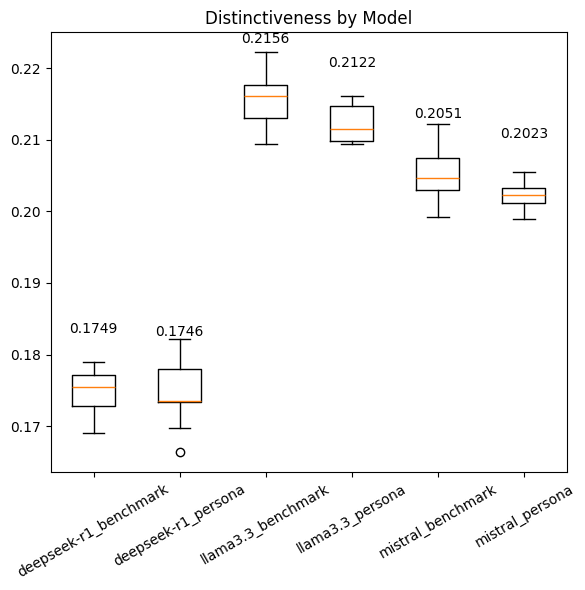

In [134]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

groups = maxd_list
labels = model_name

# Descriptive stats
print("Descriptive Statistics:")
for label, group in zip(labels, groups):
    print(f"{label}: Mean = {np.mean(group):.4f}, Variance = {np.var(group):.4f}")

# Check for equal variances (Levene's test)
levene_stat, levene_p = stats.levene(*groups)
print(f"\nLevene's Test for Equal Variances: p-value = {levene_p:.4f}")
if levene_p < 0.05:
    print("Warning: Variances may not be equal (p < 0.05). Consider a robust alternative if significant.")

# Perform one-way ANOVA
f_stat, p_value = stats.f_oneway(*groups)
print(f"\nANOVA Results:")
print(f"F-statistic: {f_stat:.4f}")
print(f"p-value: {p_value:.4f}")

# Interpret the result
alpha = 0.05
if p_value < alpha:
    print("Result: Reject the null hypothesis. There is a significant difference between the groups.")
else:
    print("Result: Fail to reject the null hypothesis. No significant difference between the groups.")

# Boxplot for visualization
plt.figure(figsize=(6, 6))
plt.boxplot(groups, labels=labels)
plt.title('Distinctiveness by Model')
plt.grid(False)
plt.xticks(rotation=30)
#annotate the mean of each group
for i, group in enumerate(groups):
    mean = np.mean(group)
    plt.annotate(f'{mean:.4f}', xy=(i + 1, mean), xytext=(i + 1, mean + 0.008),
                 fontsize=10, ha='center')
plt.tight_layout()
plt.show()

C:\Users\godfr\AppData\Local\Temp\ipykernel_25820\783488146.py:5: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(groups, labels=labels, patch_artist=True)  # Enable patch_artist for custom colors


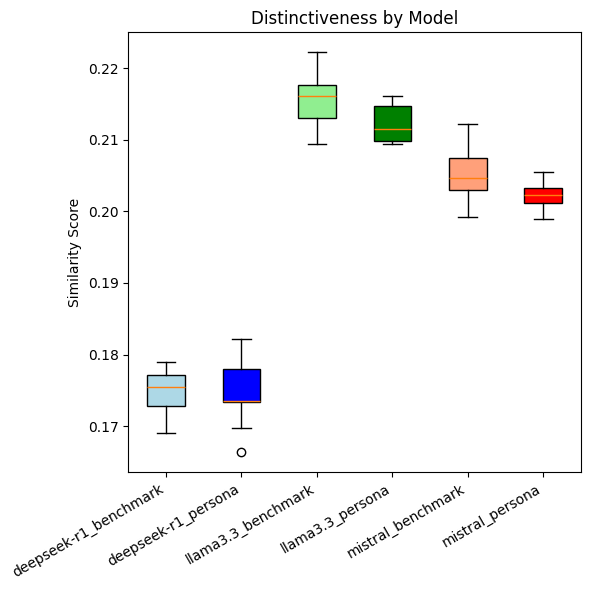

In [143]:
groups = maxd_list
labels = model_name
# Boxplot for visualization
plt.figure(figsize=(6, 6))
box = plt.boxplot(groups, labels=labels, patch_artist=True)  # Enable patch_artist for custom colors

# Define colors for each group
colors = ['lightblue', 'blue', 'lightgreen', 'green', 'lightsalmon', 'red']

# Apply colors to the boxplot
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Distinctiveness by Model')
plt.grid(False)
plt.xticks(rotation=30)
plt.gca().set_xticklabels(labels, rotation=30, ha='right')
#annotate the mean of each group
plt.ylabel("Similarity Score")
plt.tight_layout()
plt.show()

C:\Users\godfr\AppData\Local\Temp\ipykernel_25820\2330655397.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(groups, labels=labels, patch_artist=True)  # Enable patch_artist for custom colors


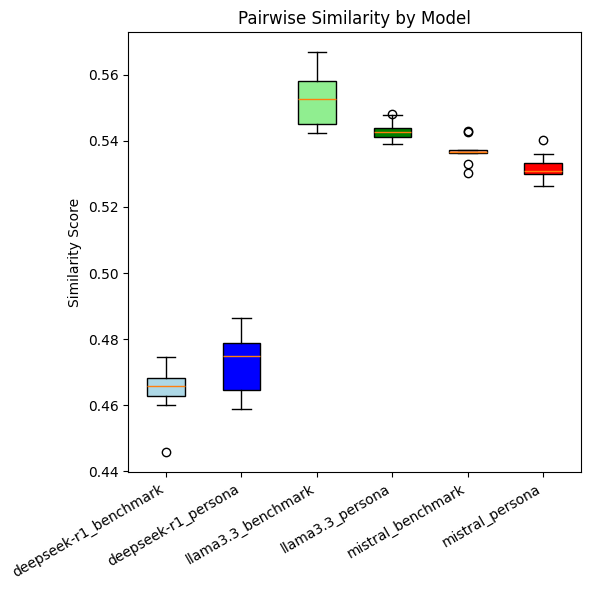

In [144]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

groups = dia_list
labels = model_name

plt.figure(figsize=(6, 6))
box = plt.boxplot(groups, labels=labels, patch_artist=True)  # Enable patch_artist for custom colors

# Define colors for each group
colors = ['lightblue', 'blue', 'lightgreen', 'green', 'lightsalmon', 'red']

# Apply colors to the boxplot
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.title('Pairwise Similarity by Model')
plt.grid(False)
plt.xticks(rotation=30)
plt.gca().set_xticklabels(labels, rotation=30, ha='right')
#annotate the mean of each group
plt.ylabel("Similarity Score")
plt.tight_layout()
plt.show()

C:\Users\godfr\AppData\Local\Temp\ipykernel_25820\4166066170.py:9: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  box = plt.boxplot(groups, labels=labels, patch_artist=True)  # Enable patch_artist for custom colors


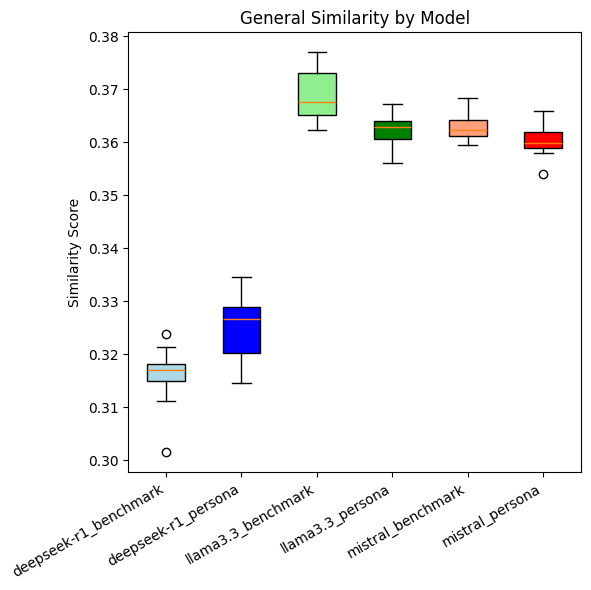

In [145]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

groups = gen_sim_list
labels = model_name

plt.figure(figsize=(6, 6))
box = plt.boxplot(groups, labels=labels, patch_artist=True)  # Enable patch_artist for custom colors

# Define colors for each group
colors = ['lightblue', 'blue', 'lightgreen', 'green', 'lightsalmon', 'red']

# Apply colors to the boxplot
for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)
plt.title('General Similarity by Model')
plt.grid(False)
plt.xticks(rotation=30)
plt.gca().set_xticklabels(labels, rotation=30, ha='right')
#annotate the mean of each group
plt.ylabel("Similarity Score")
plt.tight_layout()
plt.show()
plt.show()

### considering within model only

In [152]:
import numpy as np
from scipy import stats
from statsmodels.stats.power import TTestPower

x = 0
no_prompt_model = model_name[x]
prompt_1_model = model_name[x+1]

# no_prompt = dia_list[x] 
# prompt_1 = dia_list[x+1]  

no_prompt = maxd_list[x] 
prompt_1 = maxd_list[x+1]  

# no_prompt = gen_sim_list[x] 
# prompt_1 = gen_sim_list[x+1]  

# 2 Sample t-test (H1: Prompt1 > No Prompt)
t_stat, p_value_two_tailed = stats.ttest_ind(prompt_1, no_prompt)
p_value_one_tailed = p_value_two_tailed / 2 if t_stat > 0 else 1 - (p_value_two_tailed / 2)
print(f"Two-Sample t-test ({prompt_1_model} > {no_prompt_model}):")
print(f"t-statistic: {t_stat:.4f}, p-value (one-tailed): {p_value_one_tailed:.4f}")

# Interpretation
alpha = 0.05
if p_value_one_tailed < alpha and np.mean(prompt_1) > np.mean(no_prompt):
    print("Result: Reject H₀. Prompt1 significantly improves scores.")
else:
    print("Result: Fail to reject H₀. Prompt1 does not significantly improve scores.")

# Cohen's d (for paired data)
diffs = prompt_1 - no_prompt
cohen_d = np.mean(diffs) / np.std(diffs, ddof=1)
print(f"Cohen's d: {cohen_d:.4f}")

# Power analysis (paired t-test)
power_analysis = TTestPower()
sample_size = power_analysis.solve_power(effect_size=abs(cohen_d), nobs=None, alpha=alpha, power=0.8, alternative='larger')
print(f"Required sample size (runs): {int(np.ceil(sample_size))} (for power = 0.8, alpha = 0.05)")

Two-Sample t-test (deepseek-r1_persona > deepseek-r1_benchmark):
t-statistic: -0.1773, p-value (one-tailed): 0.5694
Result: Fail to reject H₀. Prompt1 does not significantly improve scores.
Cohen's d: -0.0532
Required sample size (runs): 2188 (for power = 0.8, alpha = 0.05)


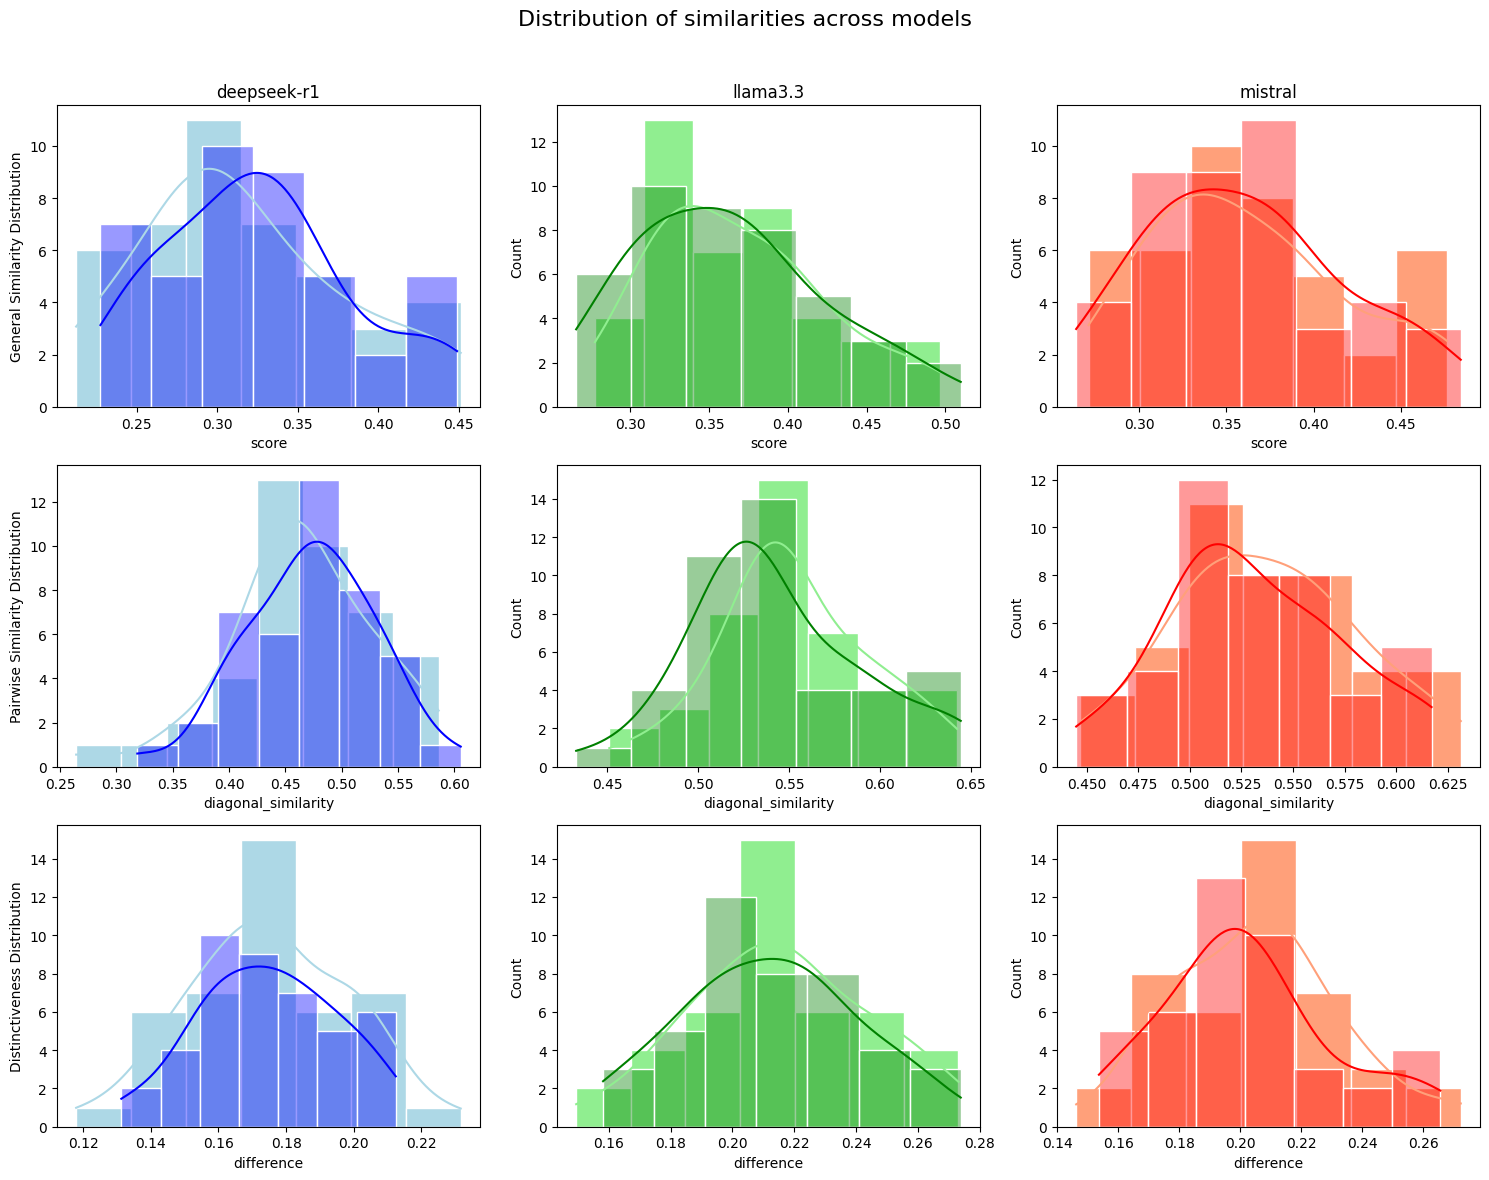

In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load job zone data
jz = pd.read_excel('datasets/job_zone.xlsx').rename(
    columns=lambda x: x.lower().replace(" ", "_")
).drop(columns=['date', 'domain_source']).rename(
    columns={'o*net-soc_code': 'code', 'job_zone': 'zone'}
)

# Get JSON files and model names
folder_name = 'results/tm'
json_files = [f for f in os.listdir(folder_name) if f.endswith('.json')]
model_name = [json_file[3:-13] for json_file in json_files]

# Create a 3x3 grid for the plots
fig, axes = plt.subplots(3, 3, figsize=(15, 12), sharex=False, sharey=False)
fig.subplots_adjust(hspace=0.4, wspace=0.3)

# Loop through each model (3 models)
for col_idx, model_idx in enumerate(range(0, len(json_files), 2)):
    # Load data for the current model
    for idx, json_file in enumerate(json_files[model_idx:model_idx + 2]):
        df = pd.read_json(os.path.join(folder_name, json_file), lines=True).dropna()
        df = df.drop(columns=["score"], axis=1)
        # Create a column for the mean of the matrix
        df["score"] = df["matrix"].apply(lambda x: np.mean(x))
        df = calculate_similarity(df)
        df = df.groupby(["title"], group_keys=False).agg({
            "ind": "first",
            "score": "mean",
            "diagonal_similarity": "mean",
            "off_diagonal_similarity": "mean",
            "difference": "mean"
        }).reset_index()

        # Determine color based on model index
        if model_idx == 0:
            color = 'lightblue' if idx == 0 else 'blue'
        elif model_idx == 2:
            color = 'lightgreen' if idx == 0 else 'green'
        elif model_idx == 4:
            color = 'lightsalmon' if idx == 0 else 'red'

        # Plot darker colors first, then lighter colors on top
        if idx == 1:  # Dark color
            sns.histplot(df["score"], ax=axes[0, col_idx], kde=True, color=color, edgecolor="white", alpha=0.4)
            sns.histplot(df["diagonal_similarity"], ax=axes[1, col_idx], kde=True, color=color, edgecolor="white", alpha=0.4)
            sns.histplot(df["difference"], ax=axes[2, col_idx], kde=True, color=color, edgecolor="white", alpha=0.4)
        else:  # Light color
            sns.histplot(df["score"], ax=axes[0, col_idx], kde=True, color=color, edgecolor="white", alpha=1.0)
            sns.histplot(df["diagonal_similarity"], ax=axes[1, col_idx], kde=True, color=color, edgecolor="white", alpha=1.0)
            sns.histplot(df["difference"], ax=axes[2, col_idx], kde=True, color=color, edgecolor="white", alpha=1.0)

        # Set titles for columns
        axes[0, col_idx].set_title(f"{model_name[model_idx][:-10]}")

# Set row labels
axes[0, 0].set_ylabel("General Similarity Distribution")
axes[1, 0].set_ylabel("Pairwise Similarity Distribution")
axes[2, 0].set_ylabel("Distinctiveness Distribution")


# Show the plot
plt.suptitle("Distribution of similarities across models", fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])  # Adjust layout to fit the title
plt.show()

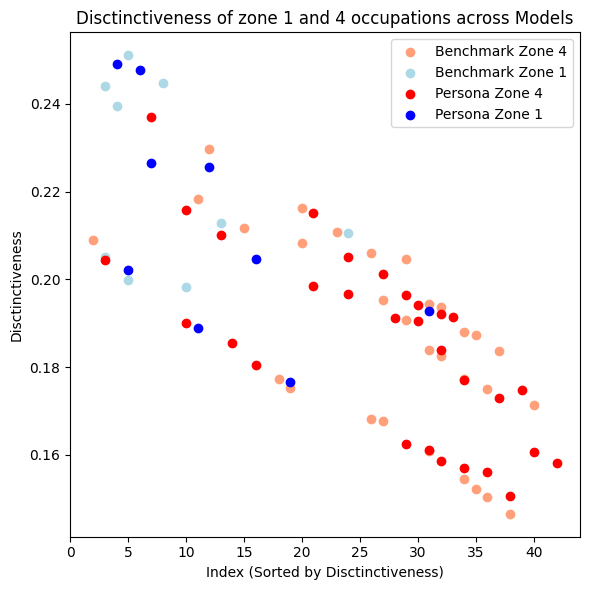

In [243]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# Indices of the models to load
model_indices = [0,1,2,3,4,5]

# Initialize a list to store dataframes for each model
dataframes = []

# Loop through the specified model indices
for idx in model_indices:
    model_file = json_files[idx]
    
    # Read and process the model
    df = pd.read_json(os.path.join(folder_name, model_file), lines=True).dropna()
    df = df.drop(columns=["score"], axis=1)
    # Create a column for the mean of the matrix
    df["score"] = df["matrix"].apply(lambda x: np.mean(x))
    df = calculate_similarity(df)
    df = df[["title", "score", "diagonal_similarity", "difference"]]
    df = df.groupby("title").agg({"score": "mean", "diagonal_similarity": "mean", "difference": "mean"})
    df = df.merge(jz, on="title", how="left")
    df = df.reset_index()
    df = df.sort_values(by="difference", ascending=False).reset_index(drop=True)  # Sort descending
    
    # Append the processed dataframe to the list
    dataframes.append(df)

# Create scatter plots for all models
plt.figure(figsize=(6, 6))
# Loop through the dataframes and plot scatter plots with colors based on job zone
for i, df in enumerate(dataframes):
    for zone in df["zone"].unique():
        if zone == 4:
            color = 'lightsalmon' if i % 2 == 0 else 'red'
        elif zone == 1:
            color = 'lightblue' if i % 2 == 0 else 'blue'
        else:
            continue  # Skip other zones
        zone_df = df[df["zone"] == zone]
        plt.scatter(zone_df.index, zone_df["difference"], label=f"Benchmark Zone {zone}" if i == 0 else f"Persona Zone {zone}", color=color)

# Add plot details
plt.title("Disctinctiveness of zone 1 and 4 occupations across Models")
plt.xlabel("Index (Sorted by Disctinctiveness)")
plt.ylabel("Disctinctiveness")
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))  # Remove duplicate labels
plt.legend(by_label.values(), by_label.keys(), loc="upper right")
plt.tight_layout()

# Show the plot
plt.show()

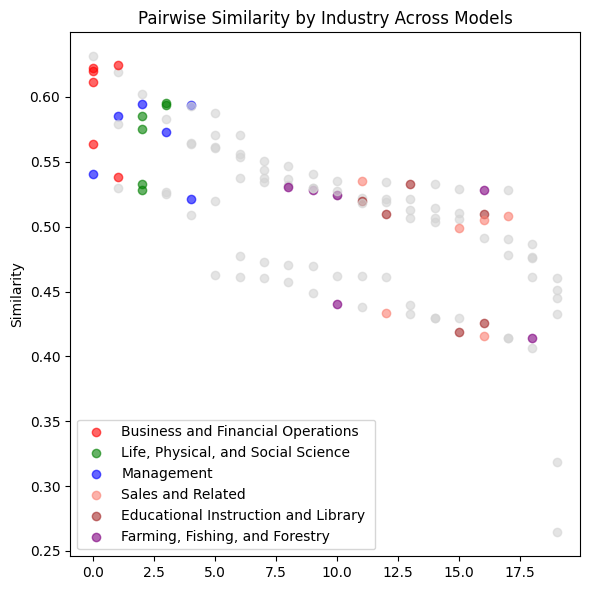

In [375]:
import pandas as pd
import os
import matplotlib.pyplot as plt

model_indices = [0, 1, 2, 3, 4, 5]
dataframes = []

# Loop through the specified model indices
for idx in model_indices:
    model_file = json_files[idx]
    
    # Read and process the model
    df = pd.read_json(os.path.join(folder_name, model_file), lines=True).dropna()
    df = df.drop(columns=["score"], axis=1)
    df["score"] = df["matrix"].apply(lambda x: np.mean(x))
    df = calculate_similarity(df)
    df = df[["ind", "title", "score", "diagonal_similarity", "difference"]]
    df = df.groupby("ind").agg({"score": "mean", "diagonal_similarity": "mean", "difference": "mean"})
    df = df.reset_index()
    df = df.sort_values(by="diagonal_similarity", ascending=False).reset_index(drop=True)  # Sort by score descending
    
    dataframes.append(df)

# Create scatter plots for all models
plt.figure(figsize=(6, 6))

# Loop through the dataframes and plot scatter plots
for i, df in enumerate(dataframes):
    for _, row in df.iterrows():
        if row["ind"] == 13:
            color = 'red'
        elif row["ind"] == 19:
            color = 'green'
        elif row["ind"] == 11:
            color = 'blue'
        elif row["ind"] == 41:
            color = 'salmon'
        elif row["ind"] == 25:
            color = 'brown'
        elif row["ind"] == 45:
            color = 'purple'
        else: color = 'lightgray'
        plt.scatter(row.name, row["diagonal_similarity"], color=color, alpha=0.6)

# Annotate the last 3 points with words on the right side
# for i, df in enumerate(dataframes):
#     for j in range(len(df) - 3, len(df)):
#         plt.annotate(f"{df['ind'].values[j]}", 
#                      (df.index.values[j], df["score"].values[j]), 
#                      fontsize=8, ha='left', va='center')

#add the legend for the color
plt.scatter([], [], label="Business and Financial Operations ", color='red', alpha=0.6)
plt.scatter([], [], label="Life, Physical, and Social Science ", color='green', alpha=0.6)
plt.scatter([], [], label="Management", color='blue', alpha=0.6)
plt.scatter([], [], label="Sales and Related ", color='salmon', alpha=0.6)
plt.scatter([], [], label="Educational Instruction and Library ", color='brown', alpha=0.6)
plt.scatter([], [], label="Farming, Fishing, and Forestry ", color='purple', alpha=0.6)
# Add plot details
plt.title("Pairwise Similarity by Industry Across Models")
plt.ylabel("Similarity")
plt.legend(loc="lower left")
plt.tight_layout()

# Show the plot
plt.show()

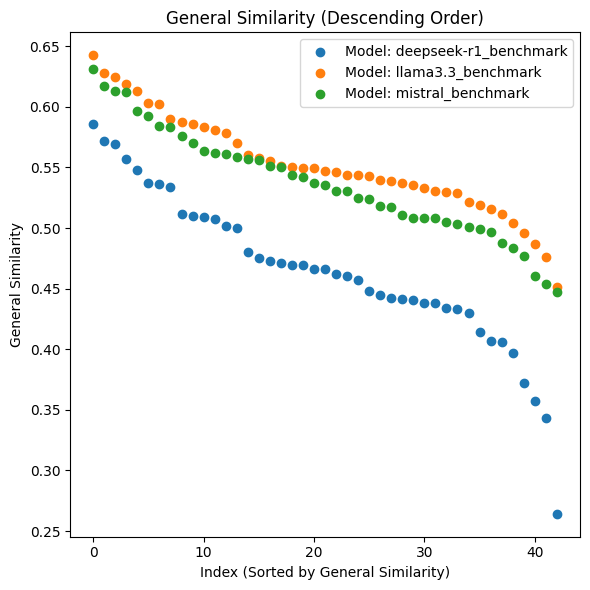

In [366]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

# Indices of the models to load
model_indices = [0, 2, 4]

# Initialize a list to store dataframes for each model
dataframes = []

# Loop through the specified model indices
for idx in model_indices:
    model_file = json_files[idx]
    
    # Read and process the model
    df = pd.read_json(os.path.join(folder_name, model_file), lines=True).dropna()
    df = df.drop(columns=["score"], axis=1)
    # Create a column for the mean of the matrix
    df["score"] = df["matrix"].apply(lambda x: np.mean(x))
    df = calculate_similarity(df)
    df = df[["title", "score", "diagonal_similarity", "difference"]]
    df = df.groupby("title").agg({"score": "mean", "diagonal_similarity": "mean", "difference": "mean"})  # Calculate general similarity
    df = df.sort_values(by="diagonal_similarity", ascending=False).reset_index(drop=True)  # Sort descending
    
    # Append the processed dataframe to the list
    dataframes.append(df)

# Create scatter plots for all models
plt.figure(figsize=(6, 6))

# Loop through the dataframes and plot scatter plots
for i, df in enumerate(dataframes):
    plt.scatter(df.index, df["diagonal_similarity"], label=f"Model: {model_name[model_indices[i]]}")

# Add plot details
plt.title("General Similarity (Descending Order)")
plt.xlabel("Index (Sorted by General Similarity)")
plt.ylabel("General Similarity")
plt.legend(loc="upper right")
plt.tight_layout()

# Show the plot
plt.show()

Model deepseek-r1_benchmark - Matrix mean range: 0.0612295234234375 to 0.49962978798554686
Model deepseek-r1_benchmark - Diagonal similarity range: 0.06611900416250001 to 0.634516417975
Model deepseek-r1_benchmark - Aggregated similarity range: 0.264272408 to 0.5861279592657143
Model llama3.3_benchmark - Matrix mean range: 0.25408474551937554 to 0.5465845275959876
Model llama3.3_benchmark - Diagonal similarity range: 0.3981663696500001 to 0.6998330073111112
Model llama3.3_benchmark - Aggregated similarity range: 0.45106339817999996 to 0.6425099334552382
Model mistral_benchmark - Matrix mean range: 0.24243889044608 to 0.5182004267398438
Model mistral_benchmark - Diagonal similarity range: 0.4007824380666667 to 0.6583399716687501
Model mistral_benchmark - Aggregated similarity range: 0.4469292057547059 to 0.6311787884890476


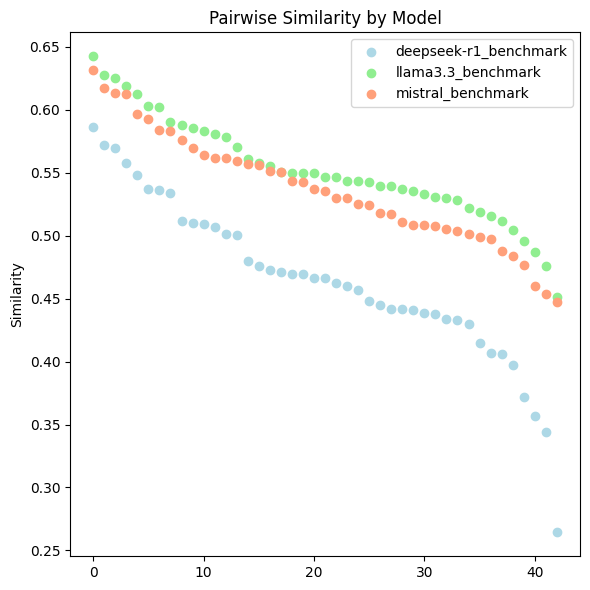

In [320]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

model_indices = [0,2,4]
dataframes = []

for idx in model_indices:
    model_file = json_files[idx]
    df = pd.read_json(os.path.join(folder_name, model_file), lines=True).dropna()
    df = df.drop(columns=["score"], axis=1)
    df["score"] = df["matrix"].apply(lambda x: np.mean(x))
    
    # Debug: Check raw matrix stats
    print(f"Model {model_name[idx]} - Matrix mean range: {df['score'].min()} to {df['score'].max()}")
    
    df = calculate_similarity(df)
    
    # Debug: Check similarity stats
    print(f"Model {model_name[idx]} - Diagonal similarity range: {df['diagonal_similarity'].min()} to {df['diagonal_similarity'].max()}")
    
    df = df[["title", "score", "diagonal_similarity", "difference"]]
    df = df.groupby("title").agg({"score": "mean", "diagonal_similarity": "mean", "difference": "mean"})
    
    # Debug: Check post-aggregation stats
    print(f"Model {model_name[idx]} - Aggregated similarity range: {df['diagonal_similarity'].min()} to {df['diagonal_similarity'].max()}")
    
    df = df.sort_values(by="diagonal_similarity", ascending=False).reset_index(drop=True)
    dataframes.append(df)

plt.figure(figsize=(6, 6))
# colors = ['blue', 'green', 'red']
colors = ['lightblue', 'lightgreen', 'lightsalmon']
for i, df in enumerate(dataframes):
    plt.scatter(df.index, df["diagonal_similarity"], label=f"{model_name[model_indices[i]]}", color=colors[i])
plt.title("Pairwise Similarity by Model")
plt.ylabel("Similarity")
plt.legend(loc="upper right")
plt.tight_layout()
plt.show()

In [ ]:
import pandas as pd
import os
#get jobzone df
jz = pd.read_excel('datasets/job_zone.xlsx')
jz.columns = jz.columns.str.lower().str.replace(" ","_")
jz['industry'] = jz['o*net-soc_code'].str[:2]
jz = jz.drop(labels=['date', 'domain_source','o*net-soc_code'], axis=1)   
jz = jz.rename(columns={'job_zone':'zone'})

full_df = pd.DataFrame()
folder_name = "results/tm"
json_files = [f for f in os.listdir(folder_name) if f.endswith('.json')]
for file in json_files:
    df = pd.read_json(f"{folder_name}/{file}", lines = True).dropna()
    df = df.drop(columns=["score"], axis=1)
    #create a column for mean of matrix
    df["general_similarity"] = df["matrix"].apply(lambda x: np.mean(x))
    df = calculate_similarity(df)
    df["model"] = file[3:-13]
    df["setup"] = df["model"].str.split("_").str[1]
    df["model"] = df["model"].str.split("_").str[0]

    full_df = pd.concat([full_df, df], ignore_index=True)
    

test = full_df[["title", "model", "setup", "general_similarity", "diagonal_similarity", "iteration"]]
test = test.merge(jz, how="left", left_on="title", right_on="title")#



,title,model,setup,general_similarity,diagonal_similarity,iteration,zone,industry
0,Hydroelectric Production Managers,deepseek-r1,benchmark,0.432224,0.565978,0,3,11
1,Water Resource Specialists,deepseek-r1,benchmark,0.481484,0.618336,0,4,11
2,Architectural and Engineering Managers,deepseek-r1,benchmark,0.332352,0.496206,0,5,11
3,Credit Counselors,deepseek-r1,benchmark,0.390566,0.517297,0,4,13
4,Personal Financial Advisors,deepseek-r1,benchmark,0.425181,0.557184,0,4,13


In [82]:
full_df.iloc[2577]["matrix"]

[[0.6358622313,
  0.5372363925,
  0.4317378402,
  0.3090988696,
  0.4804271162,
  0.36443609,
  0.3794239461,
  0.2192790508,
  0.4175724387],
 [0.30479425190000003,
  0.4596520364,
  0.38855686780000004,
  0.24689427020000002,
  0.27179050450000003,
  0.3686714768,
  0.3823932409,
  0.3668344021,
  0.4039843976],
 [0.4891427457,
  0.4824465513,
  0.2126231939,
  0.1497216523,
  0.1387960613,
  0.2995726168,
  0.1704020053,
  0.4909282923,
  0.213656649],
 [0.18110305070000002,
  0.4381836355,
  0.3734892309,
  0.1479791254,
  0.12809751930000002,
  0.1486372799,
  0.1280841827,
  0.4205959141,
  0.1679326296],
 [0.43339377640000004,
  0.2967109978,
  0.3556401134,
  0.1756213307,
  0.23491662740000002,
  0.3645499647,
  0.1607862115,
  0.1601127833,
  0.21912010010000002],
 [0.43085515500000005,
  0.5053810477,
  0.3425186276,
  0.1668810248,
  0.34981220960000003,
  0.3703841269,
  0.2545987368,
  0.30861404540000004,
  0.2854978442],
 [0.5727615356,
  0.609218955,
  0.3302953243,
  

In [27]:
test_dis = test.groupby(["title", "model", "setup"]).agg(lambda x: x.mean() if x.name.endswith("similarity") else x.iloc[0]).reset_index()
test_dis.drop(columns=["iteration"], inplace=True)
test_dis.head(10)

,title,model,setup,general_similarity,diagonal_similarity,zone,industry
0,Actors,deepseek-r1,benchmark,0.296071,0.444534,2,27
1,Actors,deepseek-r1,persona,0.329181,0.474320,2,27
2,Actors,llama3.3,benchmark,0.354605,0.543359,2,27
3,Actors,llama3.3,persona,0.325857,0.521957,2,27
4,Actors,mistral,benchmark,0.332993,0.507860,2,27
5,Actors,mistral,persona,0.328747,0.500676,2,27
6,Architectural and Engineering Managers,deepseek-r1,benchmark,0.346247,0.500355,5,11
7,Architectural and Engineering Managers,deepseek-r1,persona,0.342511,0.506168,5,11
8,Architectural and Engineering Managers,llama3.3,benchmark,0.364099,0.549848,5,11
9,Architectural and Engineering Managers,llama3.3,persona,0.373788,0.549672,5,11


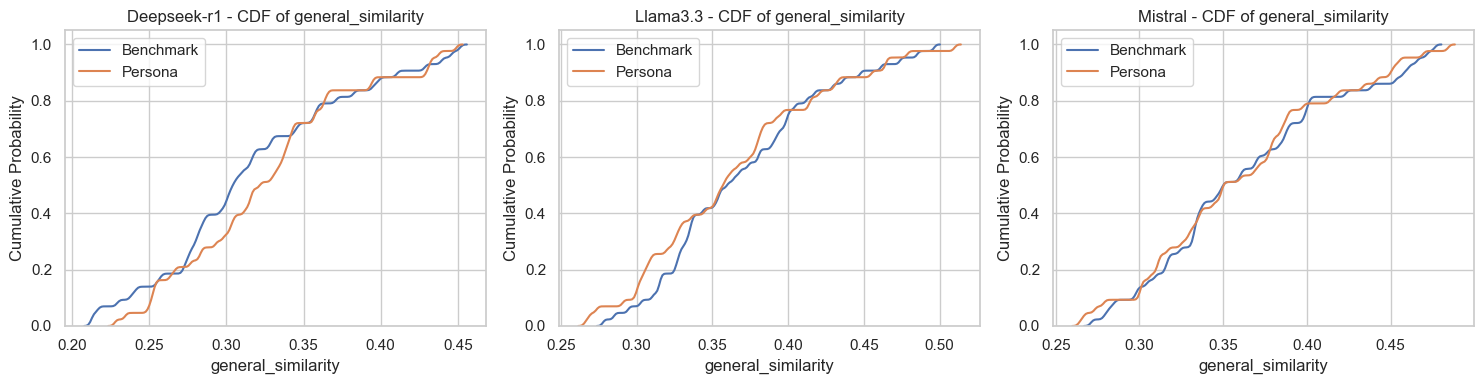

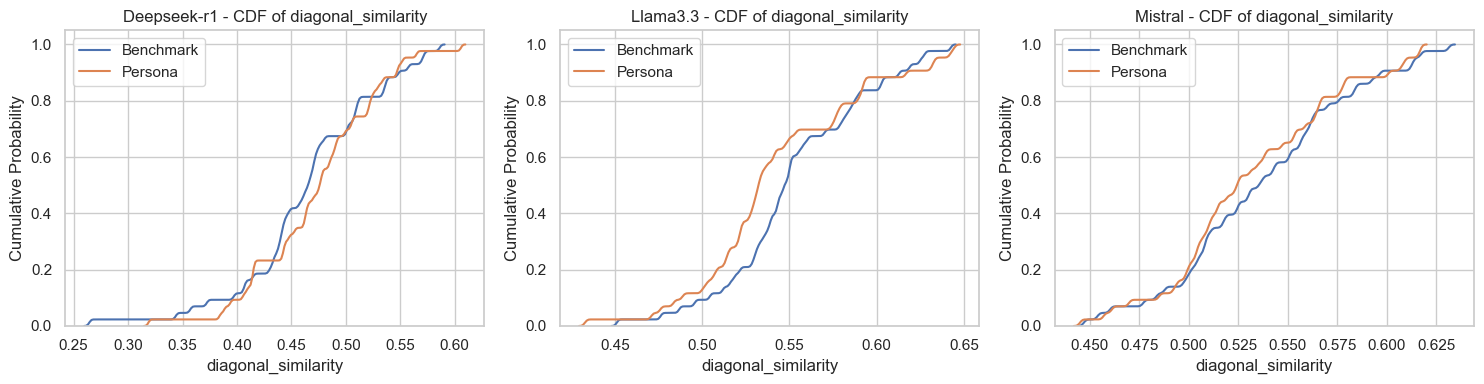

In [33]:
import seaborn as sns
# Set style
sns.set(style="whitegrid")
metrics = ["general_similarity", "diagonal_similarity"]
# 3. CDF Plots (per model)
for metric in metrics:
    plt.figure(figsize=(15, 4))
    for i, model in enumerate(["deepseek-r1", "llama3.3", "mistral"], 1):
        plt.subplot(1, 3, i)
        for setup in ["benchmark", "persona"]:
            data_subset = test_dis[(test_dis["model"] == model) & (test_dis["setup"] == setup)][metric]
            sns.kdeplot(data_subset, cumulative=True, bw_adjust=0.05, label=setup.capitalize())
        plt.title(f"{model.capitalize()} - CDF of {metric}")
        plt.xlabel(metric)
        plt.ylabel("Cumulative Probability")
        plt.legend()
    plt.tight_layout()
    plt.show()

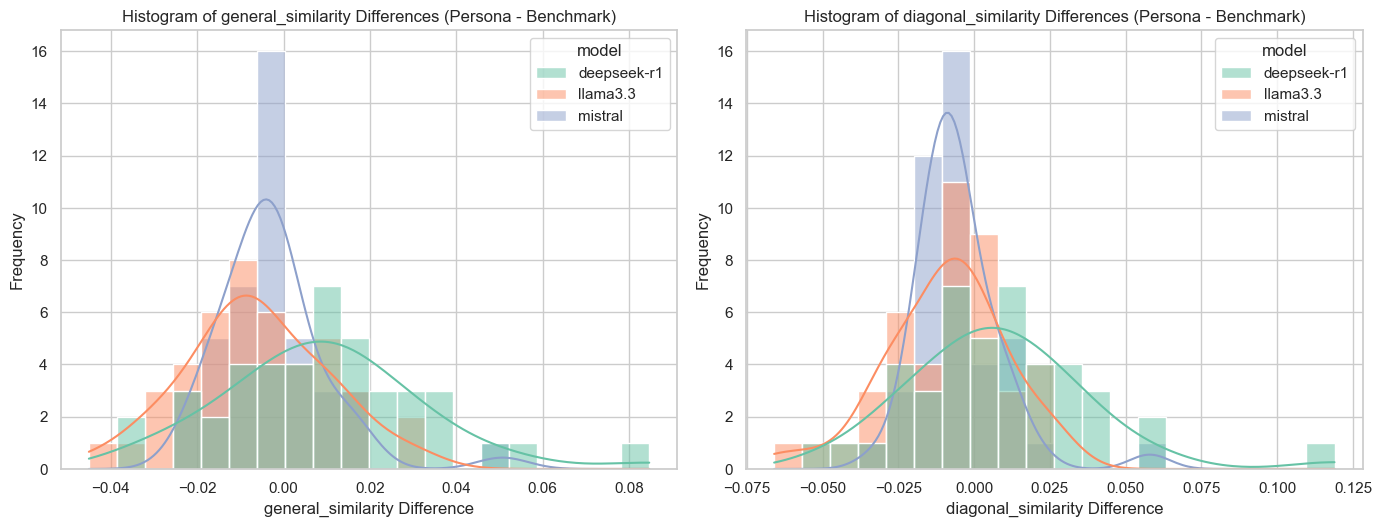

In [40]:
# Compute differences (Persona - Benchmark)
df_diff = test_dis.pivot_table(index=["title", "model"], columns="setup", values=metrics).reset_index()
for metric in metrics:
    df_diff[f"{metric}_diff"] = df_diff[metric]["persona"] - df_diff[metric]["benchmark"]

plt.figure(figsize=(14, 10))
for i, metric in enumerate(metrics, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df_diff, x=f"{metric}_diff", hue="model", kde=True, bins=20, palette="Set2")

    plt.title(f"Histogram of {metric} Differences (Persona - Benchmark)")
    plt.xlabel(f"{metric} Difference")
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

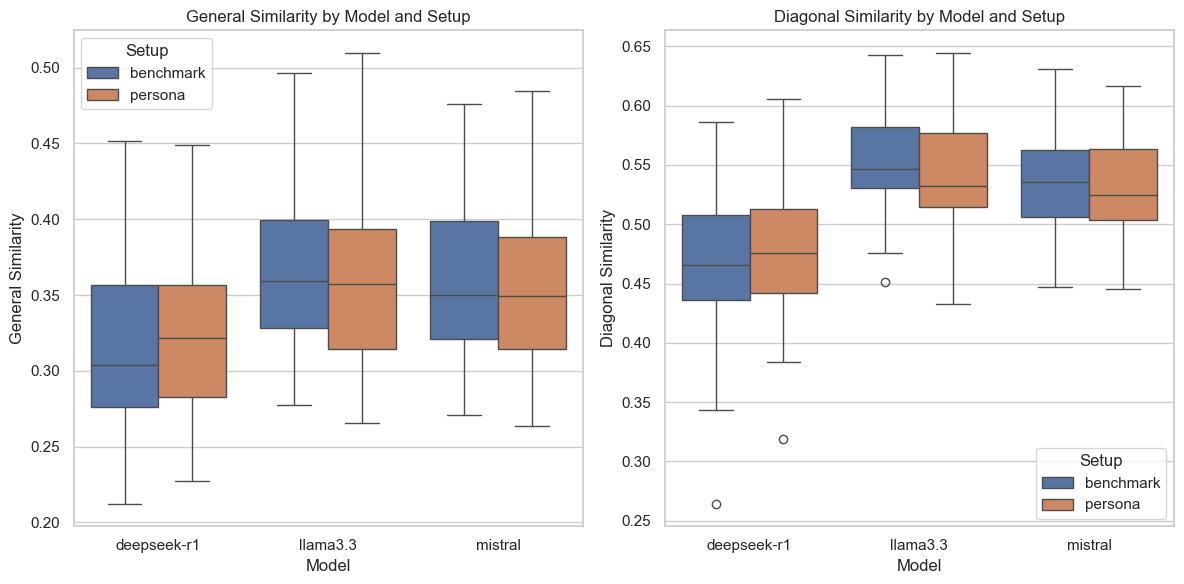

In [51]:
# Step 2: Boxplots by setup and model
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x='model', y='general_similarity', hue='setup', data=test_dis)
plt.title('General Similarity by Model and Setup')
plt.xlabel('Model')
plt.ylabel('General Similarity')
plt.legend(title='Setup')

plt.subplot(1, 2, 2)
sns.boxplot(x='model', y='diagonal_similarity', hue='setup', data=test_dis)
plt.title('Diagonal Similarity by Model and Setup')
plt.xlabel('Model')
plt.ylabel('Diagonal Similarity')
plt.legend(title='Setup')
plt.tight_layout()
plt.show()

Silhouette Score (Benchmark): 0.377
Silhouette Score (Persona): 0.391
Adjusted Rand Index (Benchmark): 0.084
Adjusted Rand Index (Persona): 0.080


C:\Users\godfr\AppData\Local\Temp\ipykernel_1460\4031831903.py:70: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


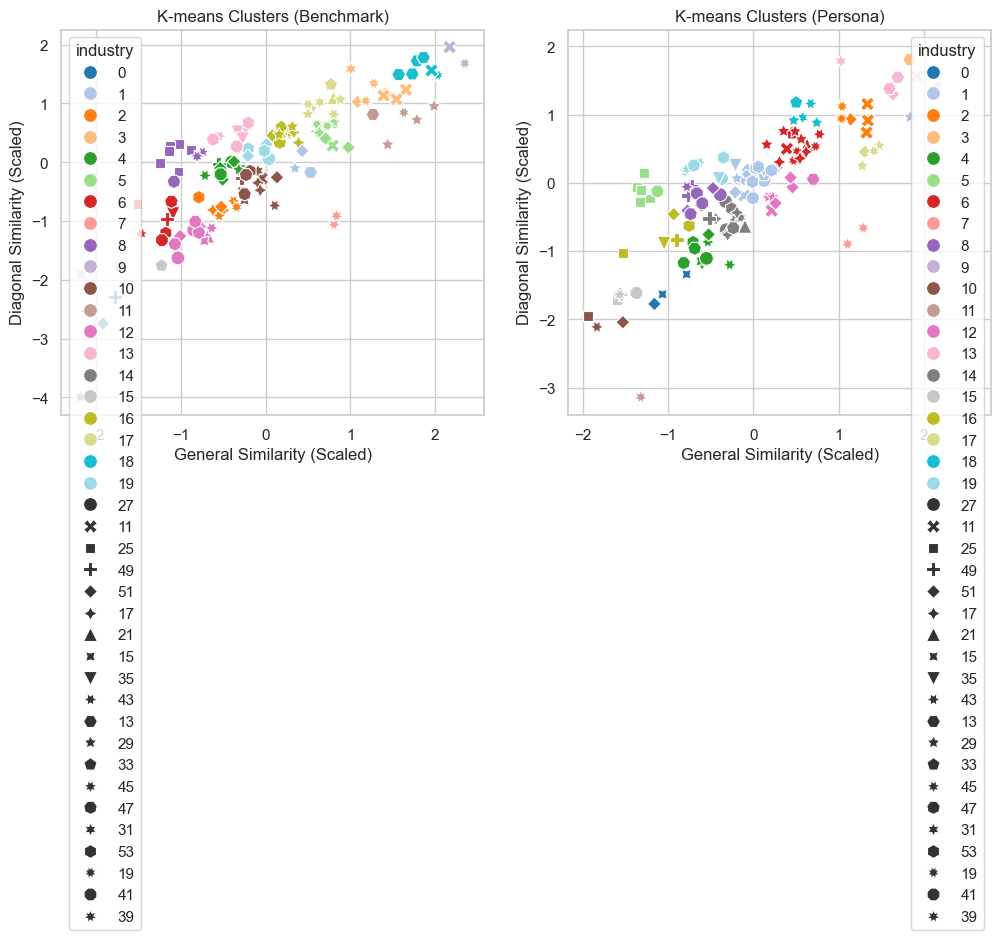

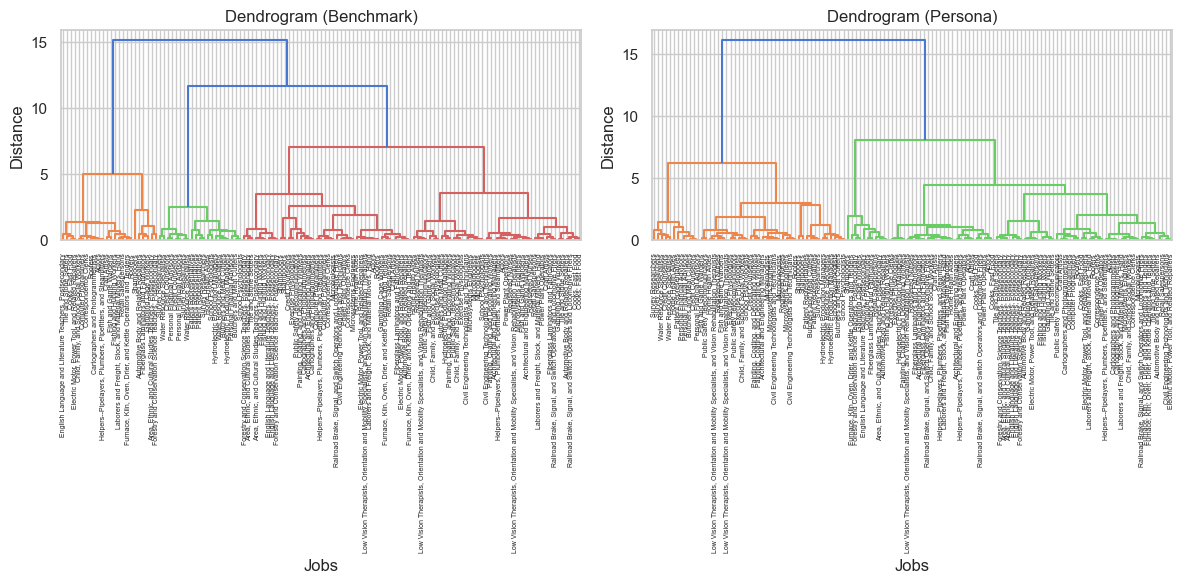

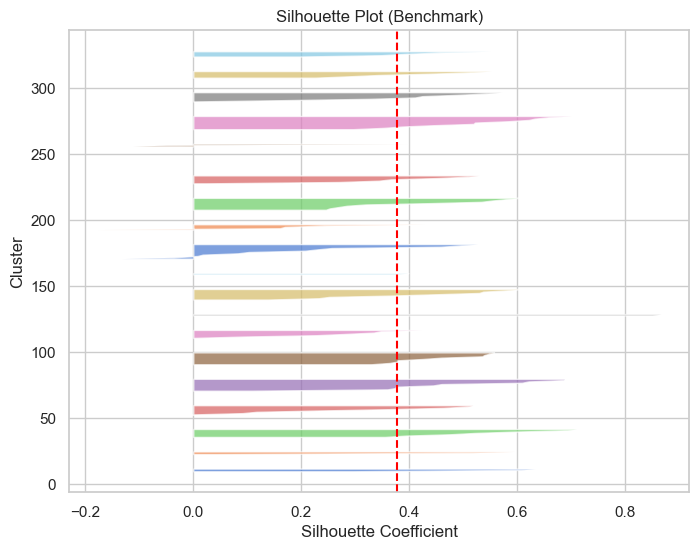

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, adjusted_rand_score
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram
from scipy.spatial.distance import pdist

# Set seaborn style for publication-ready plots
sns.set(style="whitegrid", palette="muted")


# Step 1: Aggregate similarity scores by job and setup
agg_df = test_dis.copy()

# Step 2: Create feature matrices for benchmark and persona
bench_df = agg_df[agg_df['setup'] == 'benchmark'][['title', 'general_similarity', 'diagonal_similarity', 'industry']]
persona_df = agg_df[agg_df['setup'] == 'persona'][['title', 'general_similarity', 'diagonal_similarity', 'industry']]

# Extract features (general_similarity, diagonal_similarity)
X_bench = bench_df[['general_similarity', 'diagonal_similarity']].values
X_persona = persona_df[['general_similarity', 'diagonal_similarity']].values

# Standardize features (important for k-means)
scaler = StandardScaler()
X_bench_scaled = scaler.fit_transform(X_bench)
X_persona_scaled = scaler.transform(X_persona)

# Step 3: K-means clustering (k=20 for 20 industries)
ind_count = test_dis["industry"].nunique()
kmeans_bench = KMeans(n_clusters=ind_count, random_state=42).fit(X_bench_scaled)
kmeans_persona = KMeans(n_clusters=ind_count, random_state=42).fit(X_persona_scaled)

# Step 4: Evaluate clustering
# Silhouette scores
sil_score_bench = silhouette_score(X_bench_scaled, kmeans_bench.labels_)
sil_score_persona = silhouette_score(X_persona_scaled, kmeans_persona.labels_)
print(f"Silhouette Score (Benchmark): {sil_score_bench:.3f}")
print(f"Silhouette Score (Persona): {sil_score_persona:.3f}")

# Adjusted Rand Index (alignment with industry labels)
industry_labels = bench_df['industry'].values
ari_bench = adjusted_rand_score(industry_labels, kmeans_bench.labels_)
ari_persona = adjusted_rand_score(industry_labels, kmeans_persona.labels_)
print(f"Adjusted Rand Index (Benchmark): {ari_bench:.3f}")
print(f"Adjusted Rand Index (Persona): {ari_persona:.3f}")

# Step 5: Hierarchical clustering
# Compute linkage matrix for dendrogram
linkage_bench = linkage(X_bench_scaled, method='ward')
linkage_persona = linkage(X_persona_scaled, method='ward')

# Step 6: Visualizations
# Scatter plot of clusters
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.scatterplot(x=X_bench_scaled[:, 0], y=X_bench_scaled[:, 1], hue=kmeans_bench.labels_, 
                style=bench_df['industry'], palette='tab20', s=100)
plt.title('K-means Clusters (Benchmark)')
plt.xlabel('General Similarity (Scaled)')
plt.ylabel('Diagonal Similarity (Scaled)')

plt.subplot(1, 2, 2)
sns.scatterplot(x=X_persona_scaled[:, 0], y=X_persona_scaled[:, 1], hue=kmeans_persona.labels_, 
                style=persona_df['industry'], palette='tab20', s=100)
plt.title('K-means Clusters (Persona)')
plt.xlabel('General Similarity (Scaled)')
plt.ylabel('Diagonal Similarity (Scaled)')
plt.tight_layout()
plt.show()

# Dendrogram for hierarchical clustering
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
dendrogram(linkage_bench, labels=bench_df['title'].values, leaf_rotation=90)
plt.title('Dendrogram (Benchmark)')
plt.xlabel('Jobs')
plt.ylabel('Distance')

plt.subplot(1, 2, 2)
dendrogram(linkage_persona, labels=persona_df['title'].values, leaf_rotation=90)
plt.title('Dendrogram (Persona)')
plt.xlabel('Jobs')
plt.ylabel('Distance')
plt.tight_layout()
plt.show()

# Silhouette plot (for benchmark only, repeat for persona if needed)
from sklearn.metrics import silhouette_samples
sil_vals_bench = silhouette_samples(X_bench_scaled, kmeans_bench.labels_)
sil_df_bench = pd.DataFrame({'Silhouette': sil_vals_bench, 'Cluster': kmeans_bench.labels_})
sil_df_bench = sil_df_bench.sort_values(by=['Cluster', 'Silhouette'])

plt.figure(figsize=(8, 6))
y_lower = 10
for cluster in range(20):
    cluster_vals = sil_df_bench[sil_df_bench['Cluster'] == cluster]['Silhouette']
    size = cluster_vals.shape[0]
    y_upper = y_lower + size
    plt.fill_betweenx(np.arange(y_lower, y_upper), 0, cluster_vals, alpha=0.7)
    y_lower = y_upper + 10
plt.axvline(x=sil_score_bench, color='red', linestyle='--')
plt.title('Silhouette Plot (Benchmark)')
plt.xlabel('Silhouette Coefficient')
plt.ylabel('Cluster')
plt.show()

In [63]:
np.random.seed(42)
n_jobs = 47
n_models = 3
n_setups = 2
n_trials = 10
n_rows = n_jobs * n_models * n_setups * n_trials
data = {
    'title': np.repeat(['Job_' + str(i) for i in range(n_jobs)], n_models * n_setups * n_trials),
    'model': np.tile(np.repeat(['llama', 'mistral', 'deepseek'], n_setups * n_trials), n_jobs),
    'setup': np.tile(np.repeat(['benchmark', 'persona'], n_trials), n_jobs * n_models),
    'general_similarity': np.random.uniform(0.3, 0.7, n_rows),
    'diagonal_similarity': np.random.uniform(0.4, 0.8, n_rows),
    'iteration': np.tile(np.arange(n_trials), n_jobs * n_models * n_setups),
    'zone': np.repeat(np.random.randint(1, 6, n_jobs), n_models * n_setups * n_trials),
    'industry': np.repeat(np.random.randint(1, 21, n_jobs), n_models * n_setups * n_trials)
}
df = pd.DataFrame(data)

# Load your actual dataframe (uncomment and replace)
# df = pd.read_csv('your_file.csv')

# Aggregate dataframe to one row per job per setup
agg_df = df.groupby(['title', 'setup', 'industry']).agg({
    'general_similarity': 'mean',
    'diagonal_similarity': 'mean',
    'zone': 'first'  # Keep zone as is (assumes consistent per job)
}).reset_index()


agg_df

,title,setup,industry,general_similarity,diagonal_similarity,zone
0,Job_0,benchmark,1,0.476677,0.613116,5
1,Job_0,persona,1,0.497323,0.586845,5
2,Job_1,benchmark,17,0.487155,0.599738,1
3,Job_1,persona,17,0.502220,0.600067,1
4,Job_10,benchmark,12,0.449946,0.624535,1
...,...,...,...,...,...,...
89,Job_7,persona,3,0.480977,0.593093,2
90,Job_8,benchmark,14,0.545028,0.590180,5
91,Job_8,persona,14,0.526163,0.616115,5
92,Job_9,benchmark,11,0.476320,0.583607,3


In [ ]:
test_dis

,title,model,setup,general_similarity,diagonal_similarity,zone,industry
0,Actors,deepseek-r1,benchmark,0.296071,0.444534,2,27
1,Actors,deepseek-r1,persona,0.329181,0.474320,2,27
2,Actors,llama3.3,benchmark,0.354605,0.543359,2,27
3,Actors,llama3.3,persona,0.325857,0.521957,2,27
4,Actors,mistral,benchmark,0.332993,0.507860,2,27
...,...,...,...,...,...,...,...
253,Water Resource Specialists,deepseek-r1,persona,0.432273,0.564854,4,11
254,Water Resource Specialists,llama3.3,benchmark,0.485117,0.642510,4,11
255,Water Resource Specialists,llama3.3,persona,0.478579,0.642081,4,11
256,Water Resource Specialists,mistral,benchmark,0.471727,0.617233,4,11


Aggregated dataframe shape: (258, 7)

Clustering for Setup: benchmark
deepseek-r1 Labels shape: (43,)
deepseek-r1 Number of clusters: 20
deepseek-r1 Silhouette Score: 0.329
deepseek-r1 Adjusted Rand Index: 0.005
llama3.3 Labels shape: (43,)
llama3.3 Number of clusters: 20
llama3.3 Silhouette Score: 0.315
llama3.3 Adjusted Rand Index: 0.038
mistral Labels shape: (43,)
mistral Number of clusters: 20
mistral Silhouette Score: 0.363
mistral Adjusted Rand Index: 0.015


C:\Users\godfr\AppData\Local\Temp\ipykernel_1460\2811820460.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


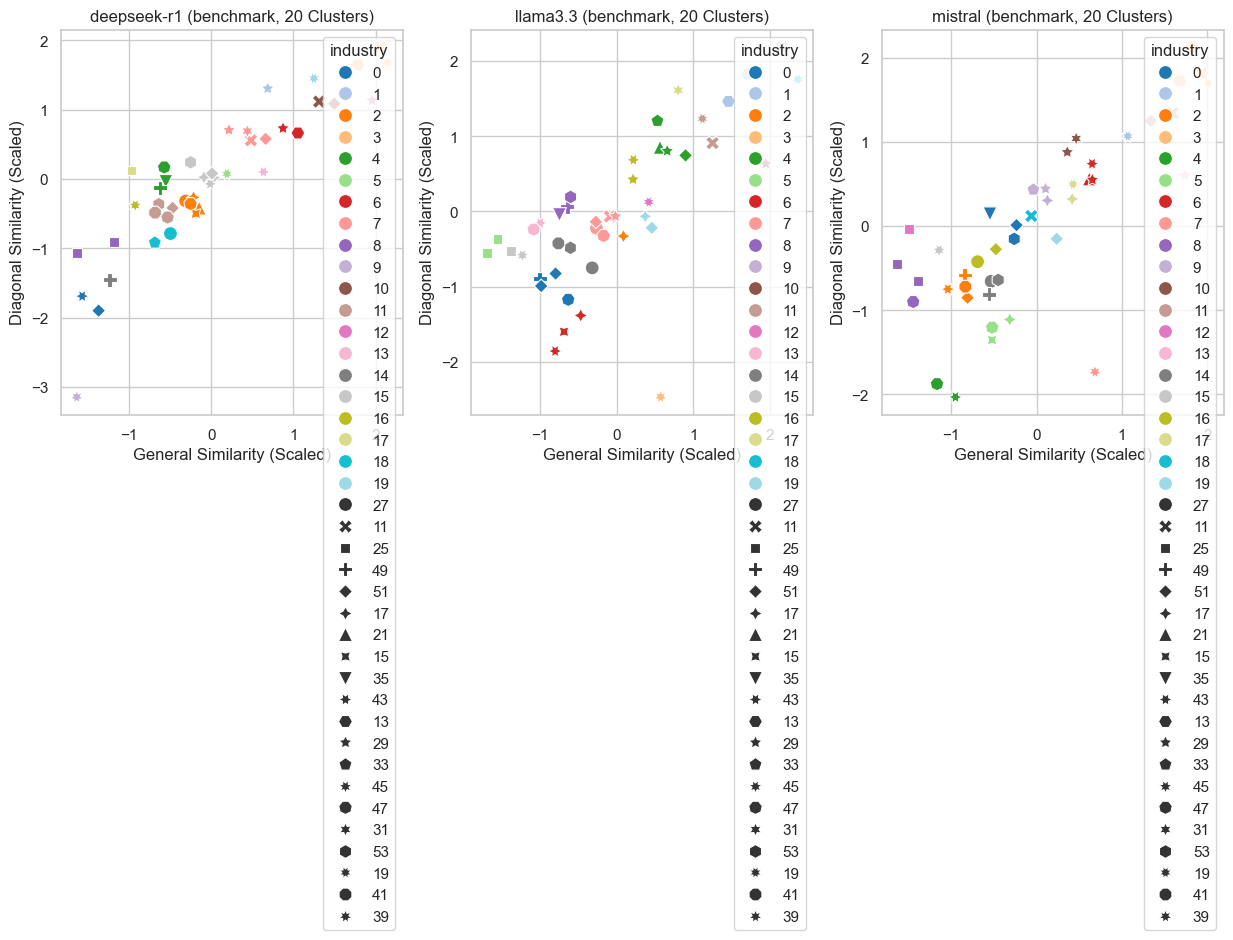


Clustering for Setup: persona
deepseek-r1 Labels shape: (43,)
deepseek-r1 Number of clusters: 20
deepseek-r1 Silhouette Score: 0.419
deepseek-r1 Adjusted Rand Index: -0.014
llama3.3 Labels shape: (43,)
llama3.3 Number of clusters: 20
llama3.3 Silhouette Score: 0.369
llama3.3 Adjusted Rand Index: 0.064
mistral Labels shape: (43,)
mistral Number of clusters: 20
mistral Silhouette Score: 0.328
mistral Adjusted Rand Index: 0.148


C:\Users\godfr\AppData\Local\Temp\ipykernel_1460\2811820460.py:64: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


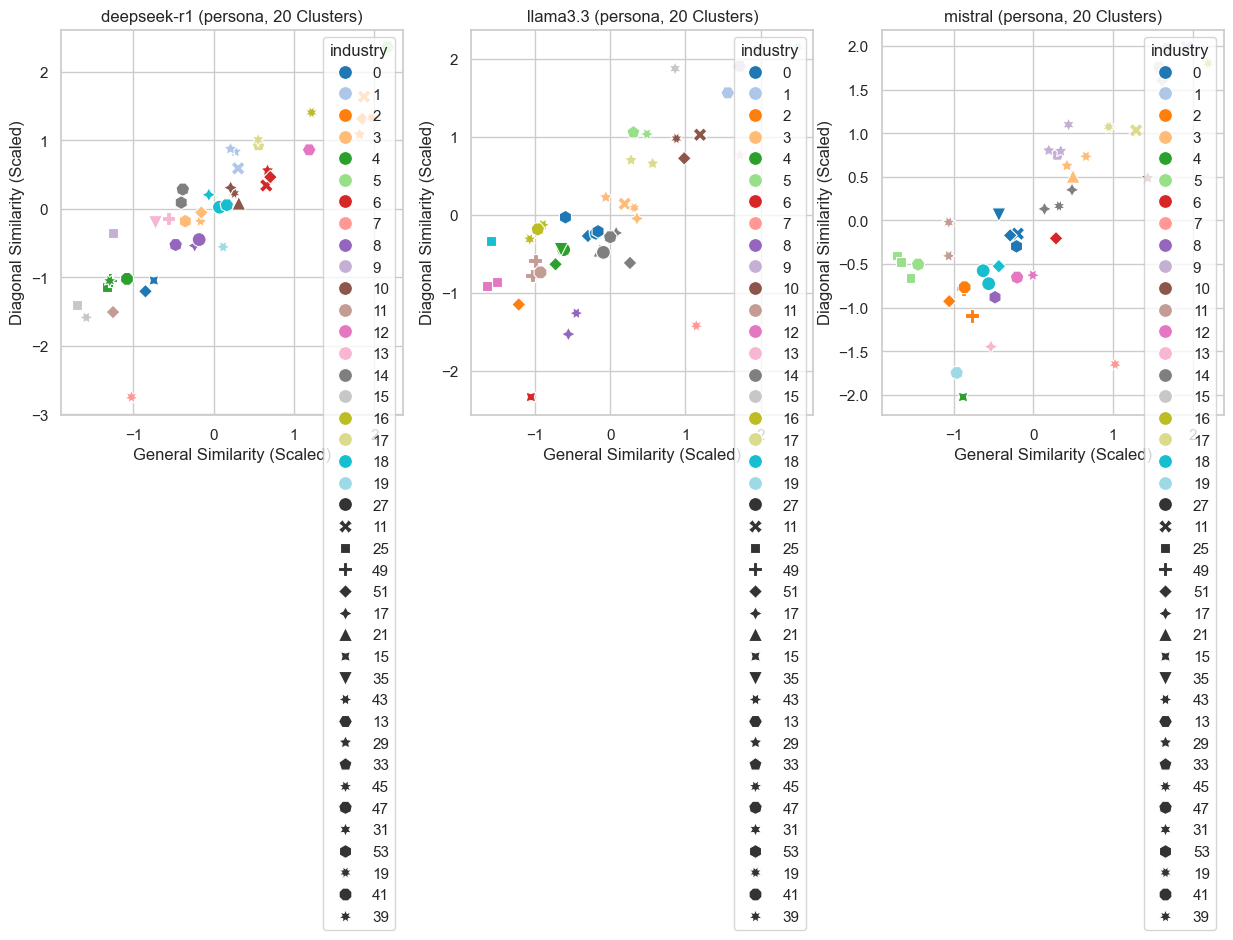


Clustering Summary:
       Setup        Model  Silhouette_Score       ARI
0  benchmark  deepseek-r1          0.328621  0.004923
1  benchmark     llama3.3          0.315362  0.038485
2  benchmark      mistral          0.363485  0.015049
3    persona  deepseek-r1          0.418504 -0.013500
4    persona     llama3.3          0.368556  0.063996
5    persona      mistral          0.327918  0.148372

Sample Cluster Assignments (deepseek-r1, benchmark):
                                                Title Industry  Cluster
0                                              Actors       27        2
6              Architectural and Engineering Managers       11        7
12  Area, Ethnic, and Cultural Studies Teachers, P...       25        8
18              Automotive Body and Related Repairers       49       14
24                          Butchers and Meat Cutters       51       10
30                Cartographers and Photogrammetrists       17        2
36           Child, Family, and School Soci

C:\Users\godfr\AppData\Local\Temp\ipykernel_1460\2811820460.py:74: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'Title': test_dis[test_dis['model'] == 'deepseek-r1'][test_dis['setup'] == 'benchmark']['title'],
C:\Users\godfr\AppData\Local\Temp\ipykernel_1460\2811820460.py:75: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  'Industry': test_dis[test_dis['model'] == 'deepseek-r1'][test_dis['setup'] == 'benchmark']['industry'],


In [74]:


print(f"Aggregated dataframe shape: {test_dis.shape}")
if test_dis.shape[0] != 43 * 3 * 2:
    raise ValueError("Expected 258 rows (43 jobs × 3 models × 2 setups).")

# Step 1: Initialize results storage
models = ['deepseek-r1', 'llama3.3', 'mistral']
setups = ['benchmark', 'persona']
results = []

# Step 2: Cluster for each model and setup
for setup in setups:
    print(f"\nClustering for Setup: {setup}")
    plt.figure(figsize=(15, 5))
    
    for idx, model in enumerate(models, 1):
        # Filter data for specific model and setup
        df_subset = test_dis[(test_dis['setup'] == setup) & (test_dis['model'] == model)]
        
        # Debugging check: Ensure 43 jobs
        if len(df_subset) != 43:
            raise ValueError(f"Expected 43 jobs for {model}, {setup}. Got {len(df_subset)}.")
        
        # Create feature matrix
        X = df_subset[['general_similarity', 'diagonal_similarity']].values
        
        # Standardize features
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
        
        # K-means clustering (k=20)
        kmeans = KMeans(n_clusters=20, random_state=42).fit(X_scaled)
        
        # Debugging check: Ensure 43 labels and 20 clusters
        print(f"{model} Labels shape: {kmeans.labels_.shape}")
        print(f"{model} Number of clusters: {len(np.unique(kmeans.labels_))}")
        if len(kmeans.labels_) != 43:
            raise ValueError(f"Labels should have 43 elements for {model}, {setup}.")
        if len(np.unique(kmeans.labels_)) > 20:
            print(f"Warning: More than 20 clusters for {model}, {setup}.")
        
        # Evaluate clustering
        sil_score = silhouette_score(X_scaled, kmeans.labels_)
        ari_score = adjusted_rand_score(df_subset['industry'], kmeans.labels_)
        print(f"{model} Silhouette Score: {sil_score:.3f}")
        print(f"{model} Adjusted Rand Index: {ari_score:.3f}")
        
        # Store results
        results.append({
            'Setup': setup,
            'Model': model,
            'Silhouette_Score': sil_score,
            'ARI': ari_score,
            'Labels': kmeans.labels_
        })
        
        # Plot clusters
        plt.subplot(1, 3, idx)
        sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=kmeans.labels_, 
                        style=df_subset['industry'], palette='tab20', s=100)
        plt.title(f'{model} ({setup}, 20 Clusters)')
        plt.xlabel('General Similarity (Scaled)')
        plt.ylabel('Diagonal Similarity (Scaled)')
    
    plt.tight_layout()
    plt.show()

# Step 3: Output summary of results
results_df = pd.DataFrame(results)[['Setup', 'Model', 'Silhouette_Score', 'ARI']]
print("\nClustering Summary:")
print(results_df)

# Step 4: Output sample cluster assignments (for first model, benchmark)
sample_assignments = pd.DataFrame({
    'Title': test_dis[test_dis['model'] == 'deepseek-r1'][test_dis['setup'] == 'benchmark']['title'],
    'Industry': test_dis[test_dis['model'] == 'deepseek-r1'][test_dis['setup'] == 'benchmark']['industry'],
    'Cluster': results[0]['Labels']
})
print("\nSample Cluster Assignments (deepseek-r1, benchmark):")
print(sample_assignments.head(10))